In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re

In [2]:
data = pd.read_csv('./credit_train.csv', encoding = 'cp1251', sep = ';')

In [3]:
data.shape

(170746, 15)

In [4]:
data.head()

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,1,M,NaN,NaN,UMN,"59998,00",10,1.6,NaN,GRD,КРАСНОДАРСКИЙ КРАЙ,30000.0,1.0,1.0,0
1,2,F,NaN,MAR,UMN,"10889,00",6,1.1,NaN,NaN,МОСКВА,NaN,2.0,0.0,0
2,3,M,32.0,MAR,SPC,"10728,00",12,1.1,NaN,NaN,ОБЛ САРАТОВСКАЯ,NaN,5.0,0.0,0
3,4,F,27.0,NaN,SPC,"12009,09",12,1.1,NaN,NaN,ОБЛ ВОЛГОГРАДСКАЯ,NaN,2.0,0.0,0
4,5,M,45.0,NaN,SPC,NaN,10,1.1,"0,421385",SCH,ЧЕЛЯБИНСКАЯ ОБЛАСТЬ,NaN,1.0,0.0,0


__Список исходных переменных включает в себя:__
- категориальный предиктор *Идентификационный номер __[client_id]__*
- категориальный предиктор *Пол __[gender]__*
- количественный предиктор *Возраст __[age]__*
- категориальный предиктор *Семейный статус __[marital_status]__*
- категориальный предиктор *Сфера занятости __[job_position]__*
- количественный предиктор *Сумма кредита __[credit_sum]__*
- количественный предиктор *Срок кредитования __[credit_month]__*
- количественный предиктор *Внутренняя скоринговая оценка __[score_shk]__*
- категориальный предиктор *Образование __[education]__*
- категориальный предиктор *Идентификационный номер тарифа __[tariff_id]__*
- количественный предиктор *Месячный заработок __[monthly_income]__*
- количественный предиктор *Количество кредитов у клиента __[credit_count]__*
- количественный предиктор *Количество просроченных кредитов у клиента __[overdue_credit_count]__*
- категориальная зависимая переменная *Факт открытия кредитного счета в данном банке __[open_account_flg]__*

__ПЛАН ПРЕДВАРИТЕЛЬНОЙ ПОДГОТОВКИ ДАННЫХ__

__До разбиения набора данных на обучающую и контрольную выборки__
- Удаление очевидных бесполезных переменных (переменных у которых количество категорий совпадает с количеством наблюдений, или переменных с одним уникальным значением;
- Преобразование типов данных;
- Нормализация строковых значений (удаление лишних символов, приведение к одному и тому же регистру);
- Обработка дублирующих наблюдений;
- Обработка редких категорий, которую можно выполнить до разбиения на обучающую и контрольную выборки;
- Импутация пропусков, которую можно выполнить до разбиения на обучающую и контрольную выборки;
- Конструирование признаков, которое можно выполнить до разбиения на обучающую и контрольную выборки;

__После разбиения набора данных на обучающую и контрольную выборки__
- Выполнение преобразований, максимизирующих нормальность;
- Обработка редких категорий, которую можно выполнить только после разбиения на обучающую и контрольную выборки;
- Импутация пропусков, которую можно выполнить только после разбиения на обучающую и контрольную выборки;
- Конструирование признаков, которое можно выполнить только после разбиения на обучающую и контрольную выборки;
- Стандартизация, дамми-кодирование

In [5]:
# для начала удалим идентификационную переменную client_id. Эта переменная имеет столько же уникальных значений, сколько
# у нас имеется наблюдений

data.drop('client_id', axis = 1, inplace = True)
data.head(5)

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,M,NaN,NaN,UMN,"59998,00",10,1.6,NaN,GRD,КРАСНОДАРСКИЙ КРАЙ,30000.0,1.0,1.0,0
1,F,NaN,MAR,UMN,"10889,00",6,1.1,NaN,NaN,МОСКВА,NaN,2.0,0.0,0
2,M,32.0,MAR,SPC,"10728,00",12,1.1,NaN,NaN,ОБЛ САРАТОВСКАЯ,NaN,5.0,0.0,0
3,F,27.0,NaN,SPC,"12009,09",12,1.1,NaN,NaN,ОБЛ ВОЛГОГРАДСКАЯ,NaN,2.0,0.0,0
4,M,45.0,NaN,SPC,NaN,10,1.1,"0,421385",SCH,ЧЕЛЯБИНСКАЯ ОБЛАСТЬ,NaN,1.0,0.0,0


In [6]:
# выведем уникальные значения по переменной living_region с помощью метода .unique()
data['living_region'].unique()

array(['КРАСНОДАРСКИЙ КРАЙ', 'МОСКВА', 'ОБЛ САРАТОВСКАЯ',
       'ОБЛ ВОЛГОГРАДСКАЯ', 'ЧЕЛЯБИНСКАЯ ОБЛАСТЬ', 'СТАВРОПОЛЬСКИЙ КРАЙ',
       'ОБЛ НИЖЕГОРОДСКАЯ', 'МОСКОВСКАЯ ОБЛ',
       'ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА', 'КРАЙ СТАВРОПОЛЬСКИЙ',
       'САНКТ-ПЕТЕРБУРГ', 'РЕСП. БАШКОРТОСТАН', 'ОБЛ АРХАНГЕЛЬСКАЯ',
       'ХАНТЫ-МАНСИЙСКИЙ АО', 'РЕСП БАШКОРТОСТАН', 'ПЕРМСКИЙ КРАЙ',
       'РЕСП КАРАЧАЕВО-ЧЕРКЕССКАЯ', 'САРАТОВСКАЯ ОБЛ', 'ОБЛ КАЛУЖСКАЯ',
       'ОБЛ ВОЛОГОДСКАЯ', 'РОСТОВСКАЯ ОБЛ', 'УДМУРТСКАЯ РЕСП',
       'ОБЛ ИРКУТСКАЯ', 'ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ', 'ОБЛ МОСКОВСКАЯ',
       'ОБЛ ТЮМЕНСКАЯ', 'ОБЛ БЕЛГОРОДСКАЯ', 'РОСТОВСКАЯ ОБЛАСТЬ',
       'ОБЛ КОСТРОМСКАЯ', 'РЕСП ХАКАСИЯ', 'РЕСПУБЛИКА ТАТАРСТАН',
       'ИРКУТСКАЯ ОБЛАСТЬ', 'ОБЛ СВЕРДЛОВСКАЯ', 'ОБЛ ПСКОВСКАЯ',
       'КРАЙ ЗАБАЙКАЛЬСКИЙ', 'СВЕРДЛОВСКАЯ ОБЛ', 'ОБЛ ОРЕНБУРГСКАЯ',
       'ОБЛ ВОРОНЕЖСКАЯ', 'ОБЛ АСТРАХАНСКАЯ', 'ОБЛ НОВОСИБИРСКАЯ',
       'ОБЛ ЧЕЛЯБИНСКАЯ', 'ОРЕНБУРГСКАЯ ОБЛ', 'СВЕРДЛОВСКАЯ ОБЛАСТЬ'

In [7]:
# теперь с помощью метода .nunique() выведем количество уникальных значений переменной
data['living_region'].nunique()

301

In [8]:
# один и тот же регион может быть записан по разному, кроме того присутствуют иные названия не имеющие отношения к регионам

# увеличим максимальное количество отбражаемых строк
pd.options.display.max_rows = 310

In [9]:
# уникальные значения переменной living_region записываем в отдельный объект regions 
regions = data['living_region'].unique()

In [10]:
# теперь создаем серию у которой в качестве индексных меток и значений будут выступать уникальные значения переменной 
# living_region записанные в regions 
regions = pd.Series(data = regions, index = regions, name = 'regions')
regions

КРАСНОДАРСКИЙ КРАЙ                                                КРАСНОДАРСКИЙ КРАЙ
МОСКВА                                                                        МОСКВА
ОБЛ САРАТОВСКАЯ                                                      ОБЛ САРАТОВСКАЯ
ОБЛ ВОЛГОГРАДСКАЯ                                                  ОБЛ ВОЛГОГРАДСКАЯ
ЧЕЛЯБИНСКАЯ ОБЛАСТЬ                                              ЧЕЛЯБИНСКАЯ ОБЛАСТЬ
СТАВРОПОЛЬСКИЙ КРАЙ                                              СТАВРОПОЛЬСКИЙ КРАЙ
ОБЛ НИЖЕГОРОДСКАЯ                                                  ОБЛ НИЖЕГОРОДСКАЯ
МОСКОВСКАЯ ОБЛ                                                        МОСКОВСКАЯ ОБЛ
ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА    ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА
КРАЙ СТАВРОПОЛЬСКИЙ                                              КРАЙ СТАВРОПОЛЬСКИЙ
САНКТ-ПЕТЕРБУРГ                                                      САНКТ-ПЕТЕРБУРГ
РЕСП. БАШКОРТОСТАН                                               

In [11]:
# создаем список стоп слов - слов которые не несут никакой смысловой нагрузки и которые можно проигнорировать
stopwrds = set(['ОБЛ', 'ОБЛАСТЬ', 'РЕСП', 'РЕСПУБЛИКА',
                'КРАЙ', 'Г', 'АО', 'АОБЛ', 'АВТОНОМНАЯ'])

In [12]:
# пишем функцию для предобработки значений серии
def clean_region(x):
    x = re.sub('[.,]+', ' ', str(x))
    wrds = x.split(' ')
    wrds_new = []
    for w in wrds:
        if not w in stopwrds:
            wrds_new.append(w)
    x = ''.join(wrds_new)
    return x    

In [13]:
# применяем функцию к нашей серии
regions = regions.map(clean_region)
regions

КРАСНОДАРСКИЙ КРАЙ                                                 КРАСНОДАРСКИЙ
МОСКВА                                                                    МОСКВА
ОБЛ САРАТОВСКАЯ                                                      САРАТОВСКАЯ
ОБЛ ВОЛГОГРАДСКАЯ                                                  ВОЛГОГРАДСКАЯ
ЧЕЛЯБИНСКАЯ ОБЛАСТЬ                                                  ЧЕЛЯБИНСКАЯ
СТАВРОПОЛЬСКИЙ КРАЙ                                               СТАВРОПОЛЬСКИЙ
ОБЛ НИЖЕГОРОДСКАЯ                                                  НИЖЕГОРОДСКАЯ
МОСКОВСКАЯ ОБЛ                                                        МОСКОВСКАЯ
ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА    ХАНТЫ-МАНСИЙСКИЙАВТОНОМНЫЙОКРУГ-ЮГРА
КРАЙ СТАВРОПОЛЬСКИЙ                                               СТАВРОПОЛЬСКИЙ
САНКТ-ПЕТЕРБУРГ                                                  САНКТ-ПЕТЕРБУРГ
РЕСП. БАШКОРТОСТАН                                                  БАШКОРТОСТАН
ОБЛ АРХАНГЕЛЬСКАЯ           

In [14]:
# вносим финальные корректировки в regions 
regions['ЧУКОТСКИЙ АО'] = 'ЧУКОТСКИЙ'
regions['ЧУВАШСКАЯ РЕСПУБЛИКА - ЧУВАШИЯ'] = 'ЧУВАШСКАЯ'
regions['ЧУВАШИЯ ЧУВАШСКАЯ РЕСПУБЛИКА'] = 'ЧУВАШСКАЯ'
regions['ЧУВАШСКАЯ - ЧУВАШИЯ РЕСП'] = 'ЧУВАШСКАЯ'
regions['РЕСП ЧУВАШСКАЯ - ЧУВАШИЯ'] = 'ЧУВАШСКАЯ'
regions['ЧУВАШСКАЯ - ЧУВАШИЯ РЕСП'] = 'ЧУВАШСКАЯ'
regions['ЧУВАШИЯ ЧУВАШСКАЯ РЕСПУБЛИКА -'] = 'ЧУВАШСКАЯ'
regions['РЕСПУБЛИКАТАТАРСТАН'] = 'ТАТАРСТАН'
regions['ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ'] = 'МОСКОВСКАЯ'
regions['ПЕРМСКАЯ ОБЛ'] = 'ПЕРМСКИЙ'
regions['ОРЁЛ'] = 'ОРЛОВСКАЯ'
regions['Г.ОДИНЦОВО МОСКОВСКАЯ ОБЛ'] = 'МОСКОВСКАЯ'
regions['МЫТИЩИНСКИЙ Р-Н'] = 'МОСКОВСКАЯ'
regions['МОСКОВСКИЙ П'] = 'МОСКОВСКАЯ'
regions['КАМЧАТСКАЯ ОБЛАСТЬ'] = 'КАМЧАТСКИЙ'
regions['ДАЛЬНИЙ ВОСТОК'] = 'МОСКОВСКАЯ'
regions['ДАЛЬНИЙВОСТОК'] = 'МОСКОВСКАЯ'
regions['ГУСЬ-ХРУСТАЛЬНЫЙ Р-Н'] = 'ВЛАДИМИРСКАЯ'
regions['ГОРЬКОВСКАЯ ОБЛ'] = 'НИЖЕГОРОДСКАЯ'
regions['ЭВЕНКИЙСКИЙ АО'] = 'КРАСНОЯРСКИЙ'
regions['ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА'] = 'ХАНТЫ-МАНСИЙСКИЙ'
regions['АО ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - Ю'] = 'ХАНТЫ-МАНСИЙСКИЙ'
regions['АО ХАНТЫ-МАНСИЙСКИЙ-ЮГРА'] = 'ХАНТЫ-МАНСИЙСКИЙ'
regions['СЕВ. ОСЕТИЯ - АЛАНИЯ'] = 'СЕВЕРНАЯОСЕТИЯ-АЛАНИЯ'
regions['РЕСП. САХА (ЯКУТИЯ)'] = 'САХА/ЯКУТИЯ/'
regions['РЕСПУБЛИКА САХА'] = 'САХА/ЯКУТИЯ/'
regions['ДАЛЬНИЙВОСТОК'] = 'МОСКОВСКАЯ'
regions['САХА'] = 'САХА/ЯКУТИЯ/'
regions['98'] = 'САНКТ-ПЕТЕРБУРГ'
regions['74'] = 'ЧЕЛЯБИНСКАЯ'
regions['РОССИЯ'] = 'МОСКОВСКАЯ'
regions['МОСКВОСКАЯ'] = 'МОСКОВСКАЯ'
regions['МОСКВОСКАЯ ОБЛ'] = 'МОСКОВСКАЯ'
regions['ЧЕЛЯБИНСК'] = 'ЧЕЛЯБИНСКАЯ'
regions['Г. ЧЕЛЯБИНСК'] = 'ЧЕЛЯБИНСКАЯ'
regions['БРЯНСКИЙ'] = 'БРЯНСКАЯ'

In [15]:
# вновь смотрим серию
regions 

КРАСНОДАРСКИЙ КРАЙ                                  КРАСНОДАРСКИЙ
МОСКВА                                                     МОСКВА
ОБЛ САРАТОВСКАЯ                                       САРАТОВСКАЯ
ОБЛ ВОЛГОГРАДСКАЯ                                   ВОЛГОГРАДСКАЯ
ЧЕЛЯБИНСКАЯ ОБЛАСТЬ                                   ЧЕЛЯБИНСКАЯ
СТАВРОПОЛЬСКИЙ КРАЙ                                СТАВРОПОЛЬСКИЙ
ОБЛ НИЖЕГОРОДСКАЯ                                   НИЖЕГОРОДСКАЯ
МОСКОВСКАЯ ОБЛ                                         МОСКОВСКАЯ
ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА         ХАНТЫ-МАНСИЙСКИЙ
КРАЙ СТАВРОПОЛЬСКИЙ                                СТАВРОПОЛЬСКИЙ
САНКТ-ПЕТЕРБУРГ                                   САНКТ-ПЕТЕРБУРГ
РЕСП. БАШКОРТОСТАН                                   БАШКОРТОСТАН
ОБЛ АРХАНГЕЛЬСКАЯ                                   АРХАНГЕЛЬСКАЯ
ХАНТЫ-МАНСИЙСКИЙ АО                              ХАНТЫ-МАНСИЙСКИЙ
РЕСП БАШКОРТОСТАН                                    БАШКОРТОСТАН
ПЕРМСКИЙ К

In [16]:
# заменяем исходные категории переменной living_region на новые
data['living_region'] = data['living_region'].map(regions)

In [17]:
# смотрим уникальные значения по переменной living_region
data['living_region'].unique()

array(['КРАСНОДАРСКИЙ', 'МОСКВА', 'САРАТОВСКАЯ', 'ВОЛГОГРАДСКАЯ',
       'ЧЕЛЯБИНСКАЯ', 'СТАВРОПОЛЬСКИЙ', 'НИЖЕГОРОДСКАЯ', 'МОСКОВСКАЯ',
       'ХАНТЫ-МАНСИЙСКИЙ', 'САНКТ-ПЕТЕРБУРГ', 'БАШКОРТОСТАН',
       'АРХАНГЕЛЬСКАЯ', 'ПЕРМСКИЙ', 'КАРАЧАЕВО-ЧЕРКЕССКАЯ', 'КАЛУЖСКАЯ',
       'ВОЛОГОДСКАЯ', 'РОСТОВСКАЯ', 'УДМУРТСКАЯ', 'ИРКУТСКАЯ',
       'ТЮМЕНСКАЯ', 'БЕЛГОРОДСКАЯ', 'КОСТРОМСКАЯ', 'ХАКАСИЯ', 'ТАТАРСТАН',
       'СВЕРДЛОВСКАЯ', 'ПСКОВСКАЯ', 'ЗАБАЙКАЛЬСКИЙ', 'ОРЕНБУРГСКАЯ',
       'ВОРОНЕЖСКАЯ', 'АСТРАХАНСКАЯ', 'НОВОСИБИРСКАЯ', 'КУРГАНСКАЯ',
       'УЛЬЯНОВСКАЯ', 'МУРМАНСКАЯ', 'КРАСНОЯРСКИЙ', 'БУРЯТИЯ',
       'САХА/ЯКУТИЯ/', 'АМУРСКАЯ', 'ХАБАРОВСКИЙ', 'ЯМАЛО-НЕНЕЦКИЙ',
       'САМАРСКАЯ', 'ТВЕРСКАЯ', 'ЯРОСЛАВСКАЯ', 'ВЛАДИМИРСКАЯ',
       'ЛЕНИНГРАДСКАЯ', 'ОРЛОВСКАЯ', 'КЕМЕРОВСКАЯ', 'ОМСКАЯ', 'ЧЕЧЕНСКАЯ',
       'КУРСКАЯ', 'ТУЛЬСКАЯ', 'АДЫГЕЯ', 'КОМИ', 'ПРИМОРСКИЙ',
       'СМОЛЕНСКАЯ', 'КИРОВСКАЯ', 'ДАГЕСТАН', 'ПЕНЗЕНСКАЯ', 'КАРЕЛИЯ',
       'ТОМСКАЯ', 'МАГАДАНСКАЯ', 'МАРИЙЭЛ', 'ИВАНО

In [18]:
# смотрим количество уникальных значений переменной living_region
data['living_region'].nunique()

85

__ПРЕОБРАЗОВАНИЕ ТИПОВ ПЕРЕМЕННЫХ__


In [19]:
# смотрим типы переменных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170746 entries, 0 to 170745
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   gender                170746 non-null  object 
 1   age                   170743 non-null  float64
 2   marital_status        170743 non-null  object 
 3   job_position          170746 non-null  object 
 4   credit_sum            170744 non-null  object 
 5   credit_month          170746 non-null  int64  
 6   tariff_id             170746 non-null  float64
 7   score_shk             170739 non-null  object 
 8   education             170741 non-null  object 
 9   living_region         170746 non-null  object 
 10  monthly_income        170741 non-null  float64
 11  credit_count          161516 non-null  float64
 12  overdue_credit_count  161516 non-null  float64
 13  open_account_flg      170746 non-null  int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 18.

In [20]:
# категориальные переменные tariff_id и open_account_flg неверно записаны как количественные
# преобразуем их в тип object
for i in ['tariff_id', 'open_account_flg']:
    data[i] = data[i].astype('object')

In [21]:
# количественные переменные credit_sum и score_shk не верно записаны как категориальные переменные
# преобразуем их в тип float 
for i in ['credit_sum', 'score_shk']:
    data[i] = data[i].str.replace(',', '.').astype('float')

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170746 entries, 0 to 170745
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   gender                170746 non-null  object 
 1   age                   170743 non-null  float64
 2   marital_status        170743 non-null  object 
 3   job_position          170746 non-null  object 
 4   credit_sum            170744 non-null  float64
 5   credit_month          170746 non-null  int64  
 6   tariff_id             170746 non-null  object 
 7   score_shk             170739 non-null  float64
 8   education             170741 non-null  object 
 9   living_region         170746 non-null  object 
 10  monthly_income        170741 non-null  float64
 11  credit_count          161516 non-null  float64
 12  overdue_credit_count  161516 non-null  float64
 13  open_account_flg      170746 non-null  object 
dtypes: float64(6), int64(1), object(7)
memory usage: 18.

In [23]:
data.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,M,NaN,NaN,UMN,59998.00,10,1.6,NaN,GRD,КРАСНОДАРСКИЙ,30000.0,1.0,1.0,0
1,F,NaN,MAR,UMN,10889.00,6,1.1,NaN,NaN,МОСКВА,NaN,2.0,0.0,0
2,M,32.0,MAR,SPC,10728.00,12,1.1,NaN,NaN,САРАТОВСКАЯ,NaN,5.0,0.0,0
3,F,27.0,NaN,SPC,12009.09,12,1.1,NaN,NaN,ВОЛГОГРАДСКАЯ,NaN,2.0,0.0,0
4,M,45.0,NaN,SPC,NaN,10,1.1,0.421385,SCH,ЧЕЛЯБИНСКАЯ,NaN,1.0,0.0,0


__ПЕРЕИМЕНОВАНИЕ КАТЕГОРИЙ ПЕРЕМЕННЫХ__

In [24]:
# изменим значения переменной gender 
# создаем словарь, в котором ключем является старое название категории, значением - новое название категории
d = {'M': 'Male', 'F': 'Female'}
# передаем словарь в метод map 
data['gender'] = data['gender'].map(d)
data.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,Male,NaN,NaN,UMN,59998.00,10,1.6,NaN,GRD,КРАСНОДАРСКИЙ,30000.0,1.0,1.0,0
1,Female,NaN,MAR,UMN,10889.00,6,1.1,NaN,NaN,МОСКВА,NaN,2.0,0.0,0
2,Male,32.0,MAR,SPC,10728.00,12,1.1,NaN,NaN,САРАТОВСКАЯ,NaN,5.0,0.0,0
3,Female,27.0,NaN,SPC,12009.09,12,1.1,NaN,NaN,ВОЛГОГРАДСКАЯ,NaN,2.0,0.0,0
4,Male,45.0,NaN,SPC,NaN,10,1.1,0.421385,SCH,ЧЕЛЯБИНСКАЯ,NaN,1.0,0.0,0


In [25]:
# аналогичную операцию можно выполнить с помощью метода replace()
# создаем словарь, в котором ключем является старое название категории, значением - новое название категории
f = {'F': 'Female', 'M': 'Male'}
# передаем в метод replace словарь
data = data.replace({'gender': f})
data.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,Male,NaN,NaN,UMN,59998.00,10,1.6,NaN,GRD,КРАСНОДАРСКИЙ,30000.0,1.0,1.0,0
1,Female,NaN,MAR,UMN,10889.00,6,1.1,NaN,NaN,МОСКВА,NaN,2.0,0.0,0
2,Male,32.0,MAR,SPC,10728.00,12,1.1,NaN,NaN,САРАТОВСКАЯ,NaN,5.0,0.0,0
3,Female,27.0,NaN,SPC,12009.09,12,1.1,NaN,NaN,ВОЛГОГРАДСКАЯ,NaN,2.0,0.0,0
4,Male,45.0,NaN,SPC,NaN,10,1.1,0.421385,SCH,ЧЕЛЯБИНСКАЯ,NaN,1.0,0.0,0


__ОБРАБОТКА РЕДКИХ КАТЕГОРИЙ__


Редкие категории являются источником шума в данных, который негативно повлияет на качество модели. Кроме того, при разбиении набора на обучающую и контрольную выборки может оказаться, что данная категория отсутствует в обучающей выборке, но присутствует в контрольной. Это вызовет проблемы при моделировании 

In [26]:
# выводим частоты категорий по каждой категориальной переменной
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
for c in categorical_columns:
    print(data[c].value_counts())

gender
Female    88697
Male      82049
Name: count, dtype: int64
marital_status
MAR    93954
UNM    52149
DIV    16969
CIV     4196
WID     3475
Name: count, dtype: int64
job_position
SPC    134680
UMN     17674
BIS      5591
PNA      4107
DIR      3750
ATP      2791
WRK       656
NOR       537
WOI       352
INP       241
BIU       126
WRP       110
PNI        65
PNV        40
PNS        12
HSK         8
INV         5
ONB         1
Name: count, dtype: int64
tariff_id
1.1     69355
1.6     39117
1.32    15537
1.4     10970
1.5      7497
1.9      5538
1.43     3930
1.3      3339
1.16     3232
1.0      2245
1.44     2228
1.19     2102
1.2      1306
1.7      1007
1.17      717
1.21      579
1.94      414
1.22      376
1.23      370
1.91      317
1.24      303
1.41      132
1.25       56
1.18       36
1.26       11
1.28       10
1.52        7
1.27        6
1.48        5
1.56        2
1.96        1
1.29        1
Name: count, dtype: int64
education
SCH    87537
GRD    72591
UGR     9941
PGR  

In [27]:
# job_position, tariff_id, living_region содержат множественные редкие категории
# выводим частоты категорий для переменной job_position 
# dropna = False выведет частоту пропусков, если они есть
print(data['job_position'].value_counts(dropna = False))

job_position
SPC    134680
UMN     17674
BIS      5591
PNA      4107
DIR      3750
ATP      2791
WRK       656
NOR       537
WOI       352
INP       241
BIU       126
WRP       110
PNI        65
PNV        40
PNS        12
HSK         8
INV         5
ONB         1
Name: count, dtype: int64


In [28]:
# видим, что переменная не содержит пропусков. Все категории с частотой менее 55 наблюдений объеденим в отдельную
# категорию other 
data['job_position'] = data['job_position'].replace(['PNV', 'PNS', 'HSK', 'INV', 'ONB'], 'OTHER')

In [29]:
print(data['job_position'].value_counts(dropna = False))

job_position
SPC      134680
UMN       17674
BIS        5591
PNA        4107
DIR        3750
ATP        2791
WRK         656
NOR         537
WOI         352
INP         241
BIU         126
WRP         110
OTHER        66
PNI          65
Name: count, dtype: int64


In [30]:
# теперь выведем частоты категорий по переменной tariff_id
print(data['tariff_id'].value_counts(dropna = False))

tariff_id
1.1     69355
1.6     39117
1.32    15537
1.4     10970
1.5      7497
1.9      5538
1.43     3930
1.3      3339
1.16     3232
1.0      2245
1.44     2228
1.19     2102
1.2      1306
1.7      1007
1.17      717
1.21      579
1.94      414
1.22      376
1.23      370
1.91      317
1.24      303
1.41      132
1.25       56
1.18       36
1.26       11
1.28       10
1.52        7
1.27        6
1.48        5
1.56        2
1.96        1
1.29        1
Name: count, dtype: int64


In [31]:
# Все категории с частотой менее 55 наблюдений объеденим в отдельную категорию 1.99
# кроме того на основе категориальной переменной tariff_id создадим количественную переменную tariff
# затем переменной tariff_id присвоим тип str и заменим в ее значениях точки на нижнее подчеркивание
# если этого не сделать, то при использовании Catboost выдаст ошибку

data.loc[data['tariff_id'].value_counts()[data['tariff_id']].values < 55, 'tariff_id'] = 1.99
data['tariff'] = data['tariff_id'].astype('float')
data['tariff_id'] = data['tariff_id'].astype('str').str.replace('.', '_')

# этот программный код будет работать только при отсутствии Nan / NA, в противном случае будет ошибка

In [32]:
print(data['tariff_id'].value_counts(dropna = False))

tariff_id
1_1     69355
1_6     39117
1_32    15537
1_4     10970
1_5      7497
1_9      5538
1_43     3930
1_3      3339
1_16     3232
1_0      2245
1_44     2228
1_19     2102
1_2      1306
1_7      1007
1_17      717
1_21      579
1_94      414
1_22      376
1_23      370
1_91      317
1_24      303
1_41      132
1_99       79
1_25       56
Name: count, dtype: int64


In [33]:
# выведем частоты переменной living_region. Поскольку категорий очень много, выведем последние 10
print(data['living_region'].value_counts(dropna = False).tail(10))

living_region
ЕВРЕЙСКАЯ      203
nan            192
НЕНЕЦКИЙ       172
МАГАДАНСКАЯ    159
ДАГЕСТАН        69
АЛТАЙ           54
ЧУКОТСКИЙ       32
ЧЕЧЕНСКАЯ       31
ИНГУШЕТИЯ       19
ЧИТИНСКАЯ       17
Name: count, dtype: int64


Теперь необходимо определится с пороговой относительной частотой. В данном случае мы хотим объединить категории с частотой 50 наблюдений и меньше в категорию other. мы делим 50 наблюдений на общее количество наблюдений в наборе данных (170 746 наблюдений), умножаем на 100 и получаем пороговую относительную частоту 0,029. С помощью программного кода, приведенного ниже, мы делим частоту каждой категории на общее количество наблюдений на общее количество наблюдений в наборе данных умножаем на 100 и получаем пороговую относительную частоту 0,029. Если относительная частота категории меньше 0,029, возвращаем значение True если больше возвращаем False

In [34]:
region_series = data['living_region'].value_counts()
mask = (region_series/region_series.sum() * 100).lt(0.029)
mask.tail(10)

living_region
ЕВРЕЙСКАЯ      False
nan            False
НЕНЕЦКИЙ       False
МАГАДАНСКАЯ    False
ДАГЕСТАН       False
АЛТАЙ          False
ЧУКОТСКИЙ       True
ЧЕЧЕНСКАЯ       True
ИНГУШЕТИЯ       True
ЧИТИНСКАЯ       True
Name: count, dtype: bool

In [35]:
# теперь с помощью функции np.where() мы все категории по которым получили TRUE заменим на категорию OTHER 
data['living_region'] = np.where(data['living_region'].isin(region_series[mask].index), 'OTHER', data['living_region'])
print(data['living_region'].value_counts(dropna = False).tail(10))

living_region
КАМЧАТСКИЙ               412
СЕВЕРНАЯОСЕТИЯ-АЛАНИЯ    379
КАЛМЫКИЯ                 305
ЕВРЕЙСКАЯ                203
nan                      192
НЕНЕЦКИЙ                 172
МАГАДАНСКАЯ              159
OTHER                     99
ДАГЕСТАН                  69
АЛТАЙ                     54
Name: count, dtype: int64


__РАЗБИЕНИЕ НАБОРА НА ОБУЧАЮЩУЮ И КОНТРОЛЬНУЮ ВЫБОРКИ__

In [36]:
# с помощью метода .sample() из исходного датафрейма data случайно отбираем 70% наблюдений в обучающий датафрейм test
train = data.sample(frac = 0.7, random_state = 200)

# в исходном датафрейме оставляем только те наблюдения, индексные метки которых отличаются от индекса наблюдений,
# попавших в обучающий датафрейм train и записываем контрольный датафрейм test
test = data.drop(train.index)

__ИМПУТАЦИЯ ПРОПУСКОВ__


In [37]:
# выводим информацию о количестве пропусков по каждой переменной в обучающей выборке
train.isnull().sum()

gender                     0
age                        1
marital_status             1
job_position               0
credit_sum                 1
credit_month               0
tariff_id                  0
score_shk                  4
education                  2
living_region              0
monthly_income             2
credit_count            6477
overdue_credit_count    6477
open_account_flg           0
tariff                     0
dtype: int64

In [38]:
# выводим информацию о количестве пропусков по каждой переменной в контрольной выборке
test.isnull().sum()

gender                     0
age                        2
marital_status             2
job_position               0
credit_sum                 1
credit_month               0
tariff_id                  0
score_shk                  3
education                  3
living_region              0
monthly_income             3
credit_count            2753
overdue_credit_count    2753
open_account_flg           0
tariff                     0
dtype: int64

Импутация __средним, медианой и прочими статистиками__ необходимо выполнять после разбиения на обучающую и контрольную выборки

Пропуски можно заменить __константой__ до разбиения на выборки

Бинарные переменные, у которых есть пропуски, можно превратить в __категориальные__ с тремя признакими -1, 0, 1

Пропуски в категориальных переменных можно заменить самой часто встречающейся категорией - __модой__



In [39]:
# заполняем пропуски в переменной age медианой
train['age'].fillna(train['age'].median(), inplace = True)
test['age'].fillna(train['age'].median(), inplace = True)

# заполняем пропуски в переменной age средним
# train['age'].fillna(train['age'].mean(), inplace = True)
# test['age'].fillna(train['age'].mean(), inplace = True)

In [40]:
# заполняем пропуски в переменных credit_sum, score_shk, monthly_income медианами
for i in ['credit_sum', 'score_shk', 'monthly_income']:
    train[i].fillna(train[i].median(), inplace = True)
    test[i].fillna(train[i].median(), inplace = True)

In [41]:
# заполняем пропуски в переменных credit_count, overdue_credit_count -1
for i in ['credit_count', 'overdue_credit_count']:
    train[i].fillna(-1, inplace = True)
for i in ['credit_count', 'overdue_credit_count']:
    test[i].fillna(-1, inplace = True)

In [42]:
# выводим частоты категорий для переменной marital_status
print(train['marital_status'].value_counts(dropna = False))
print(test['marital_status'].value_counts(dropna = False))

marital_status
MAR    65652
UNM    36581
DIV    11918
CIV     2942
WID     2428
NaN        1
Name: count, dtype: int64
marital_status
MAR    28302
UNM    15568
DIV     5051
CIV     1254
WID     1047
NaN        2
Name: count, dtype: int64


Заменим пропуски модой - самой часто встречающейся категорией, в данном случае категорией MAR

In [43]:
# вычисляем моду для переменной 
train['marital_status'].mode()

0    MAR
Name: marital_status, dtype: object

In [44]:
# выполняем импутацию пропусков модой
train['marital_status'] = train['marital_status'].fillna('MAR')
test['marital_status'] = test['marital_status'].fillna('MAR')

In [45]:
# выводим частоты категорий для переменной marital_status
print(train['marital_status'].value_counts(dropna = False))
print(test['marital_status'].value_counts(dropna = False))

marital_status
MAR    65653
UNM    36581
DIV    11918
CIV     2942
WID     2428
Name: count, dtype: int64
marital_status
MAR    28304
UNM    15568
DIV     5051
CIV     1254
WID     1047
Name: count, dtype: int64


In [46]:
# выводим частоты категорий для переменной education
print(train['education'].value_counts(dropna = False))
print(test['education'].value_counts(dropna = False))

education
SCH    61126
GRD    50928
UGR     6973
PGR      418
ACD       75
NaN        2
Name: count, dtype: int64
education
SCH    26411
GRD    21663
UGR     2968
PGR      147
ACD       32
NaN        3
Name: count, dtype: int64


In [47]:
# выполняем импутацию пропусков модой
train['education'].fillna(train['education'].value_counts().index[0], inplace = True)
test['education'].fillna(train['education'].value_counts().index[0], inplace = True)

In [48]:
# выводим частоты категорий для переменной education
print(train['education'].value_counts(dropna = False))
print(test['education'].value_counts(dropna = False))

education
SCH    61128
GRD    50928
UGR     6973
PGR      418
ACD       75
Name: count, dtype: int64
education
SCH    26414
GRD    21663
UGR     2968
PGR      147
ACD       32
Name: count, dtype: int64


__КОНСТРУИРОВАНИЕ НОВЫХ ПРИЗНАКОВ__ 

In [49]:
# создаем переменную paym, которая является отношением выданной суммы кредита (credit_sum) к сроку кредита (credit_month)
# то есть ежемесячной суммой кредита
train['paym'] = train['credit_sum'] / train['credit_month']
test['paym'] = test['credit_sum'] / test['credit_month']

In [50]:
# создаем переменную pti, которая является отношением ежемесячной суммы кредита (paym) к ежемесячному заработку (monthly_income)
train['pti'] = train['paym'] / train['monthly_income']
test['pti'] = test['paym'] / test['monthly_income']

In [51]:
# заменяем бесконечные значения на 1
train['pti'].replace([np.inf, -np.inf], 1, inplace = True)
test['pti'].replace([np.inf, -np.inf], 1, inplace = True)

__Создание переменной у которой значения основаны на значениях исходной переменной__

In [52]:
# выводим уникальные значения исходной переменной job_position 
print(train['job_position'].unique())

['SPC' 'UMN' 'BIS' 'DIR' 'PNA' 'ATP' 'OTHER' 'WRK' 'BIU' 'NOR' 'WOI' 'INP'
 'PNI' 'WRP']


In [53]:
# создаем словарь в котором ключем будет значение исходной переменной job_position а значением - значение будущей 
# переменной avzarplata

dct = {'UMN': 51000, 'SPC': 63000, 'INP': 55000, 'DIR': 60000,
       'ATP': 46000, 'PNA': 71000, 'BIS': 86000, 'WOI': 76000,
       'NOR': 54000, 'WRK': 77000, 'WRP': 75000, 'PNV': 67000,
       'BIU': 43000, 'PNI': 69000, 'HSK': 74000, 'PNS': 44000,
       'INV': 88000, 'ONB': 62000, 'OTHER': 20000}

# создаем новую переменную avzarplata, у которой значения сопоставлены значениями переменной job_position 
train['avzarplata'] = train['job_position'].map(dct)
train.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg,tariff,paym,pti,avzarplata
53397,Male,28.0,UNM,SPC,33579.0,10,1_4,0.431360,SCH,АМУРСКАЯ,36000.0,2.0,0.0,0,1.40,3357.900000,0.093275,63000
143962,Male,38.0,UNM,SPC,23511.0,10,1_32,0.358472,GRD,СТАВРОПОЛЬСКИЙ,45000.0,2.0,0.0,0,1.32,2351.100000,0.052247,63000
146922,Female,25.0,MAR,SPC,39990.0,24,1_5,0.613475,GRD,РОСТОВСКАЯ,50000.0,6.0,0.0,0,1.50,1666.250000,0.033325,63000
63697,Female,65.0,UNM,UMN,3490.0,6,1_3,0.371355,GRD,ХАКАСИЯ,35000.0,4.0,0.0,0,1.30,581.666667,0.016619,51000
54503,Male,49.0,MAR,BIS,36358.0,10,1_6,0.645187,SCH,ЧЕЛЯБИНСКАЯ,50000.0,2.0,0.0,0,1.60,3635.800000,0.072716,86000


In [54]:
# удалим переменную avzarplata
train.drop('avzarplata', axis = 1, inplace = True)
train.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg,tariff,paym,pti
53397,Male,28.0,UNM,SPC,33579.0,10,1_4,0.431360,SCH,АМУРСКАЯ,36000.0,2.0,0.0,0,1.40,3357.900000,0.093275
143962,Male,38.0,UNM,SPC,23511.0,10,1_32,0.358472,GRD,СТАВРОПОЛЬСКИЙ,45000.0,2.0,0.0,0,1.32,2351.100000,0.052247
146922,Female,25.0,MAR,SPC,39990.0,24,1_5,0.613475,GRD,РОСТОВСКАЯ,50000.0,6.0,0.0,0,1.50,1666.250000,0.033325
63697,Female,65.0,UNM,UMN,3490.0,6,1_3,0.371355,GRD,ХАКАСИЯ,35000.0,4.0,0.0,0,1.30,581.666667,0.016619
54503,Male,49.0,MAR,BIS,36358.0,10,1_6,0.645187,SCH,ЧЕЛЯБИНСКАЯ,50000.0,2.0,0.0,0,1.60,3635.800000,0.072716


__Создание бинарной переменной на основе значений количественных переменных__

In [55]:
# создаем новую переменную retired, которая принимает значениие Yes если значение age > 60, и значениние No
# если значение < 60
train['retired'] = np.where(train['age'] >= 60, 'Yes', 'No')
train.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg,tariff,paym,pti,retired
53397,Male,28.0,UNM,SPC,33579.0,10,1_4,0.431360,SCH,АМУРСКАЯ,36000.0,2.0,0.0,0,1.40,3357.900000,0.093275,No
143962,Male,38.0,UNM,SPC,23511.0,10,1_32,0.358472,GRD,СТАВРОПОЛЬСКИЙ,45000.0,2.0,0.0,0,1.32,2351.100000,0.052247,No
146922,Female,25.0,MAR,SPC,39990.0,24,1_5,0.613475,GRD,РОСТОВСКАЯ,50000.0,6.0,0.0,0,1.50,1666.250000,0.033325,No
63697,Female,65.0,UNM,UMN,3490.0,6,1_3,0.371355,GRD,ХАКАСИЯ,35000.0,4.0,0.0,0,1.30,581.666667,0.016619,Yes
54503,Male,49.0,MAR,BIS,36358.0,10,1_6,0.645187,SCH,ЧЕЛЯБИНСКАЯ,50000.0,2.0,0.0,0,1.60,3635.800000,0.072716,No


In [56]:
# создаем переменную age_inc которая принимает значение Yes если речь идет о клиентах старше 35 и с суммой кредита свыше 10000
# в противном случае принимает значение No 
train['age_inc'] = np.where((train['age'] > 35) & (train['credit_sum'] > 10000), 'Yes', 'No')
train.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg,tariff,paym,pti,retired,age_inc
53397,Male,28.0,UNM,SPC,33579.0,10,1_4,0.431360,SCH,АМУРСКАЯ,36000.0,2.0,0.0,0,1.40,3357.900000,0.093275,No,No
143962,Male,38.0,UNM,SPC,23511.0,10,1_32,0.358472,GRD,СТАВРОПОЛЬСКИЙ,45000.0,2.0,0.0,0,1.32,2351.100000,0.052247,No,Yes
146922,Female,25.0,MAR,SPC,39990.0,24,1_5,0.613475,GRD,РОСТОВСКАЯ,50000.0,6.0,0.0,0,1.50,1666.250000,0.033325,No,No
63697,Female,65.0,UNM,UMN,3490.0,6,1_3,0.371355,GRD,ХАКАСИЯ,35000.0,4.0,0.0,0,1.30,581.666667,0.016619,Yes,No
54503,Male,49.0,MAR,BIS,36358.0,10,1_6,0.645187,SCH,ЧЕЛЯБИНСКАЯ,50000.0,2.0,0.0,0,1.60,3635.800000,0.072716,No,Yes


In [57]:
# удаляем переменные retired и age_inc
train.drop(['retired', 'age_inc'], axis = 1, inplace = True)
train.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg,tariff,paym,pti
53397,Male,28.0,UNM,SPC,33579.0,10,1_4,0.431360,SCH,АМУРСКАЯ,36000.0,2.0,0.0,0,1.40,3357.900000,0.093275
143962,Male,38.0,UNM,SPC,23511.0,10,1_32,0.358472,GRD,СТАВРОПОЛЬСКИЙ,45000.0,2.0,0.0,0,1.32,2351.100000,0.052247
146922,Female,25.0,MAR,SPC,39990.0,24,1_5,0.613475,GRD,РОСТОВСКАЯ,50000.0,6.0,0.0,0,1.50,1666.250000,0.033325
63697,Female,65.0,UNM,UMN,3490.0,6,1_3,0.371355,GRD,ХАКАСИЯ,35000.0,4.0,0.0,0,1.30,581.666667,0.016619
54503,Male,49.0,MAR,BIS,36358.0,10,1_6,0.645187,SCH,ЧЕЛЯБИНСКАЯ,50000.0,2.0,0.0,0,1.60,3635.800000,0.072716


__Создание переменной, у которой каждое значение - среднее значение количественной переменной, взятое по уровню категориальной переменной__

При решение конкурсных задач часто повысить качество модели позволяет переменная, у которой каждое значение - это среднее значение количественной переменной взятое по уровню категориальной переменной

Поскольку используется вычисления по набору данных, то такие переменные нужно создавать после разбиения на обучающую и контрольную выборки


In [58]:
# пишем функцию, создающую переменную, у которой каждое значение - средним значением количественной переменной
# (real_feature), взятым по уровню категориальной переменной (cat_feature)
def code_mean(df, cat_feature, real_feature):
    return (df[cat_feature].map(df.groupby(cat_feature)[real_feature].mean()))

# создаем переменную, у которой каждое значение - среднее значение monthly_income в категории living_region
train['region_mean_income'] = code_mean(train, 'living_region', 'monthly_income')
train.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg,tariff,paym,pti,region_mean_income
53397,Male,28.0,UNM,SPC,33579.0,10,1_4,0.431360,SCH,АМУРСКАЯ,36000.0,2.0,0.0,0,1.40,3357.900000,0.093275,38026.071197
143962,Male,38.0,UNM,SPC,23511.0,10,1_32,0.358472,GRD,СТАВРОПОЛЬСКИЙ,45000.0,2.0,0.0,0,1.32,2351.100000,0.052247,32589.184487
146922,Female,25.0,MAR,SPC,39990.0,24,1_5,0.613475,GRD,РОСТОВСКАЯ,50000.0,6.0,0.0,0,1.50,1666.250000,0.033325,34645.748347
63697,Female,65.0,UNM,UMN,3490.0,6,1_3,0.371355,GRD,ХАКАСИЯ,35000.0,4.0,0.0,0,1.30,581.666667,0.016619,33443.197674
54503,Male,49.0,MAR,BIS,36358.0,10,1_6,0.645187,SCH,ЧЕЛЯБИНСКАЯ,50000.0,2.0,0.0,0,1.60,3635.800000,0.072716,34010.612707


In [59]:
# удалим новую переменную
train.drop('region_mean_income', axis = 1, inplace = True)
train.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg,tariff,paym,pti
53397,Male,28.0,UNM,SPC,33579.0,10,1_4,0.431360,SCH,АМУРСКАЯ,36000.0,2.0,0.0,0,1.40,3357.900000,0.093275
143962,Male,38.0,UNM,SPC,23511.0,10,1_32,0.358472,GRD,СТАВРОПОЛЬСКИЙ,45000.0,2.0,0.0,0,1.32,2351.100000,0.052247
146922,Female,25.0,MAR,SPC,39990.0,24,1_5,0.613475,GRD,РОСТОВСКАЯ,50000.0,6.0,0.0,0,1.50,1666.250000,0.033325
63697,Female,65.0,UNM,UMN,3490.0,6,1_3,0.371355,GRD,ХАКАСИЯ,35000.0,4.0,0.0,0,1.30,581.666667,0.016619
54503,Male,49.0,MAR,BIS,36358.0,10,1_6,0.645187,SCH,ЧЕЛЯБИНСКАЯ,50000.0,2.0,0.0,0,1.60,3635.800000,0.072716


__Возведение в квадрат__

In [60]:
# отключаем экспонциальную запись
pd.set_option('display.float_format', lambda x: '%.3f' % x)
train.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg,tariff,paym,pti
53397,Male,28.000,UNM,SPC,33579.000,10,1_4,0.431,SCH,АМУРСКАЯ,36000.000,2.000,0.000,0,1.400,3357.900,0.093
143962,Male,38.000,UNM,SPC,23511.000,10,1_32,0.358,GRD,СТАВРОПОЛЬСКИЙ,45000.000,2.000,0.000,0,1.320,2351.100,0.052
146922,Female,25.000,MAR,SPC,39990.000,24,1_5,0.613,GRD,РОСТОВСКАЯ,50000.000,6.000,0.000,0,1.500,1666.250,0.033
63697,Female,65.000,UNM,UMN,3490.000,6,1_3,0.371,GRD,ХАКАСИЯ,35000.000,4.000,0.000,0,1.300,581.667,0.017
54503,Male,49.000,MAR,BIS,36358.000,10,1_6,0.645,SCH,ЧЕЛЯБИНСКАЯ,50000.000,2.000,0.000,0,1.600,3635.800,0.073


In [61]:
# создаем новые переменныеб возведя некоторые количественные в квадрат
train['tariff_sq'] = train['tariff'] ** 2
test['tariff_sq'] = test['tariff'] ** 2

train['age_sq'] = train['age'] ** 2
test['age_sq'] = test['age'] ** 2

train['credit_sum_sq'] = train['credit_sum'] ** 2
test['credit_sum_sq'] = test['credit_sum'] ** 2

train['score_sq'] = train['score_shk'] ** 2
test['score_sq'] = test['score_shk'] ** 2

train['monthly_sq'] = train['monthly_income'] ** 2
test['monthly_sq'] = test['monthly_income'] ** 2

train['credit_month_sq'] = train['credit_month'] ** 2
test['credit_month_sq'] = test['credit_month'] ** 2

train['credit_count_sq'] = train['credit_count'] ** 2
test['credit_count_sq'] = test['credit_count'] ** 2

__Дамми-кодирование (One-hot Encoding)__

Библтотека Pandas предлагает очень простой способ прямого кодирования с помощью функции __pd.get_dummies( )__. Параметр drop_first задает тип дамми-кодирования. По умолчанию для этого параметра задано значение False и выполняется дамми-кодирование по методу неполного ранга, в противном случае будет выполнено дамми-кодирование по методу полного ранга

In [62]:
# выполняем дамми-кодирование переменной marital_status по методу неполного ранга
dummies_unfull_rank_marital_status = pd.get_dummies(train['marital_status'], dtype=int)
dummies_unfull_rank_marital_status.head()

,CIV,DIV,MAR,UNM,WID
53397,0,0,0,1,0
143962,0,0,0,1,0
146922,0,0,1,0,0
63697,0,0,0,1,0
54503,0,0,1,0,0


In [63]:
# выполняем дамми-кодирование переменной marital_status по методу полного ранга
dummies_full_rank_marital_status = pd.get_dummies(train['marital_status'], drop_first = True, dtype=int)
dummies_full_rank_marital_status.head()

,DIV,MAR,UNM,WID
53397,0,0,1,0
143962,0,0,1,0
146922,0,1,0,0
63697,0,0,1,0
54503,0,1,0,0


__Кодирование контрастами (Effect Coding)__

Кодирование контрастами похоже на дамми-кодирование по методу ранга только с той разницей, что в опорном уровне, представленном нулями, нули заменяются на -1

In [64]:
effect_marital_status = pd.get_dummies(train['marital_status'], dtype=int)
effect_marital_status = effect_marital_status.iloc[:,:-1]
effect_marital_status.loc[np.all(effect_marital_status == 0, axis = 1)] = -1
effect_marital_status.head(10)

,CIV,DIV,MAR,UNM
53397,0,0,0,1
143962,0,0,0,1
146922,0,0,1,0
63697,0,0,0,1
54503,0,0,1,0
115316,0,0,0,1
16354,0,0,0,1
98227,-1,-1,-1,-1
69607,0,0,1,0
99745,0,0,0,1


__Присвоение категориям в лексиграфическом порядке целочисленных значений, начиная с 0 (Label Encoding)__

Можно выполнить Label Encoding как до разбиения на обучающую и контрольную выборки, так и после, поскольку не делается никаких вычислений.На практике этот метод применяют вручную и чаще всего для порядковых переменных. Для номинальных переменных такая кодировка редко бывает эффективна


In [65]:
# импортируем класс LabelEncoder
from sklearn.preprocessing import LabelEncoder

# создаем экземпляр класса LabelEncoder
label_encoder = LabelEncoder().fit(train['job_position'])

# выполняем кодировку
train['job_position2'] = label_encoder.transform(train['job_position'])
train.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,...,paym,pti,tariff_sq,age_sq,credit_sum_sq,score_sq,monthly_sq,credit_month_sq,credit_count_sq,job_position2
53397,Male,28.000,UNM,SPC,33579.000,10,1_4,0.431,SCH,АМУРСКАЯ,...,3357.900,0.093,1.960,784.000,1127549241.000,0.186,1296000000.000,100,4.000,9
143962,Male,38.000,UNM,SPC,23511.000,10,1_32,0.358,GRD,СТАВРОПОЛЬСКИЙ,...,2351.100,0.052,1.742,1444.000,552767121.000,0.129,2025000000.000,100,4.000,9
146922,Female,25.000,MAR,SPC,39990.000,24,1_5,0.613,GRD,РОСТОВСКАЯ,...,1666.250,0.033,2.250,625.000,1599200100.000,0.376,2500000000.000,576,36.000,9
63697,Female,65.000,UNM,UMN,3490.000,6,1_3,0.371,GRD,ХАКАСИЯ,...,581.667,0.017,1.690,4225.000,12180100.000,0.138,1225000000.000,36,16.000,10
54503,Male,49.000,MAR,BIS,36358.000,10,1_6,0.645,SCH,ЧЕЛЯБИНСКАЯ,...,3635.800,0.073,2.560,2401.000,1321904164.000,0.416,2500000000.000,100,4.000,1


In [66]:
# удалим переменную job_position2
train.drop('job_position2', axis = 1, inplace = True)
train.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,...,tariff,paym,pti,tariff_sq,age_sq,credit_sum_sq,score_sq,monthly_sq,credit_month_sq,credit_count_sq
53397,Male,28.000,UNM,SPC,33579.000,10,1_4,0.431,SCH,АМУРСКАЯ,...,1.400,3357.900,0.093,1.960,784.000,1127549241.000,0.186,1296000000.000,100,4.000
143962,Male,38.000,UNM,SPC,23511.000,10,1_32,0.358,GRD,СТАВРОПОЛЬСКИЙ,...,1.320,2351.100,0.052,1.742,1444.000,552767121.000,0.129,2025000000.000,100,4.000
146922,Female,25.000,MAR,SPC,39990.000,24,1_5,0.613,GRD,РОСТОВСКАЯ,...,1.500,1666.250,0.033,2.250,625.000,1599200100.000,0.376,2500000000.000,576,36.000
63697,Female,65.000,UNM,UMN,3490.000,6,1_3,0.371,GRD,ХАКАСИЯ,...,1.300,581.667,0.017,1.690,4225.000,12180100.000,0.138,1225000000.000,36,16.000
54503,Male,49.000,MAR,BIS,36358.000,10,1_6,0.645,SCH,ЧЕЛЯБИНСКАЯ,...,1.600,3635.800,0.073,2.560,2401.000,1321904164.000,0.416,2500000000.000,100,4.000


__Создание переменной, у которой каждое значение - частота наблюдений в категории переменных (Frequency Encoding)__

In [67]:
# закодируем категории абсолютными частотами
# создаем переменную region_abs_freq, у которой каждое значение абсолютная частота наблюдений в категории переменной living_region
abs_freq = train['living_region'].value_counts()
train['region_abs_freq'] = train['living_region'].map(abs_freq)
test['region_abs_freq'] = test['living_region'].map(abs_freq)
train.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,...,paym,pti,tariff_sq,age_sq,credit_sum_sq,score_sq,monthly_sq,credit_month_sq,credit_count_sq,region_abs_freq
53397,Male,28.000,UNM,SPC,33579.000,10,1_4,0.431,SCH,АМУРСКАЯ,...,3357.900,0.093,1.960,784.000,1127549241.000,0.186,1296000000.000,100,4.000,618
143962,Male,38.000,UNM,SPC,23511.000,10,1_32,0.358,GRD,СТАВРОПОЛЬСКИЙ,...,2351.100,0.052,1.742,1444.000,552767121.000,0.129,2025000000.000,100,4.000,3236
146922,Female,25.000,MAR,SPC,39990.000,24,1_5,0.613,GRD,РОСТОВСКАЯ,...,1666.250,0.033,2.250,625.000,1599200100.000,0.376,2500000000.000,576,36.000,3024
63697,Female,65.000,UNM,UMN,3490.000,6,1_3,0.371,GRD,ХАКАСИЯ,...,581.667,0.017,1.690,4225.000,12180100.000,0.138,1225000000.000,36,16.000,344
54503,Male,49.000,MAR,BIS,36358.000,10,1_6,0.645,SCH,ЧЕЛЯБИНСКАЯ,...,3635.800,0.073,2.560,2401.000,1321904164.000,0.416,2500000000.000,100,4.000,3620


In [68]:
# теперь закодируем категории относительными частотами
# создаем переменную region_rel_freq у которой каждое значение - относительная частота наблдений в категории living_region
rel_freq = train['living_region'].value_counts() / len(train['living_region'])
train['region_rel_freq'] = train['living_region'].map(rel_freq)
test['region_rel_freq'] = test['living_region'].map(rel_freq)
train.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,...,pti,tariff_sq,age_sq,credit_sum_sq,score_sq,monthly_sq,credit_month_sq,credit_count_sq,region_abs_freq,region_rel_freq
53397,Male,28.000,UNM,SPC,33579.000,10,1_4,0.431,SCH,АМУРСКАЯ,...,0.093,1.960,784.000,1127549241.000,0.186,1296000000.000,100,4.000,618,0.005
143962,Male,38.000,UNM,SPC,23511.000,10,1_32,0.358,GRD,СТАВРОПОЛЬСКИЙ,...,0.052,1.742,1444.000,552767121.000,0.129,2025000000.000,100,4.000,3236,0.027
146922,Female,25.000,MAR,SPC,39990.000,24,1_5,0.613,GRD,РОСТОВСКАЯ,...,0.033,2.250,625.000,1599200100.000,0.376,2500000000.000,576,36.000,3024,0.025
63697,Female,65.000,UNM,UMN,3490.000,6,1_3,0.371,GRD,ХАКАСИЯ,...,0.017,1.690,4225.000,12180100.000,0.138,1225000000.000,36,16.000,344,0.003
54503,Male,49.000,MAR,BIS,36358.000,10,1_6,0.645,SCH,ЧЕЛЯБИНСКАЯ,...,0.073,2.560,2401.000,1321904164.000,0.416,2500000000.000,100,4.000,3620,0.030


In [69]:
# удалим переменные region_abs_freq и region_rel_freq
train.drop(['region_abs_freq', 'region_rel_freq'], axis = 1, inplace = True)

__Категоризация (бининг) количественной переменной__

Бининг - это разбивка диапазона значений переменной на интервалы (бины). Основная причина проведения бининга - это борьба с нелинейностью при построении скоринговых моделей на основе логистической регрессии

__Категоризация на основе интервалов, заданных вручную__

В питоновской библиотеке Pandas биннинг на основе интервалов одинаковой ширины или интервалов, заданных вручную, выполняется с помощью функции cut(  ). Данная функция имеет общий вид:

pandas.cut(x, bins, right = True, labels = None, precision = 3, include_lowest = False)

где:

- __x__ - задает 1-мерный входной массив для бининга
- __bins__ - задает правило бининга (целочисленное значение - определяет количество бинов одинаковой ширины; последовательность скаляров - определяет точки разбиения, допускается разная ширина бинов; IntervalIndex - определяет точные границы бинов)
- __right__ - закрывает интервалы справа, если задано значение True, либо слева если False
- __labels__ - задает метки бинов. Должен иметь длину, совпадающую с количеством бинов. Если задано значение False, возвращает числовые метки бинов
- __precision__ - задает точность используемую для хранения и отображения числовых меток бинов
- __include_lowest__ - если задано значение True, включает самое нижнее значение точек разбиения

In [70]:
# категоризируем переменную monthly_income
# задаем точки, в которых будут находится границы категорий (до 50 000, от 50 000 до 200 000, от 200 000 и выше)
bins = [-np.inf, 50000, 200000, np.inf]

# задаем метки для категорий будущей переменной
group_names = ['Low', 'Average', 'High']

# осуществим бининг и запишем результаты в новую переменную
train['incomecat'] = pd.cut(train['monthly_income'], bins, labels = group_names)
train.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,...,paym,pti,tariff_sq,age_sq,credit_sum_sq,score_sq,monthly_sq,credit_month_sq,credit_count_sq,incomecat
53397,Male,28.000,UNM,SPC,33579.000,10,1_4,0.431,SCH,АМУРСКАЯ,...,3357.900,0.093,1.960,784.000,1127549241.000,0.186,1296000000.000,100,4.000,Low
143962,Male,38.000,UNM,SPC,23511.000,10,1_32,0.358,GRD,СТАВРОПОЛЬСКИЙ,...,2351.100,0.052,1.742,1444.000,552767121.000,0.129,2025000000.000,100,4.000,Low
146922,Female,25.000,MAR,SPC,39990.000,24,1_5,0.613,GRD,РОСТОВСКАЯ,...,1666.250,0.033,2.250,625.000,1599200100.000,0.376,2500000000.000,576,36.000,Low
63697,Female,65.000,UNM,UMN,3490.000,6,1_3,0.371,GRD,ХАКАСИЯ,...,581.667,0.017,1.690,4225.000,12180100.000,0.138,1225000000.000,36,16.000,Low
54503,Male,49.000,MAR,BIS,36358.000,10,1_6,0.645,SCH,ЧЕЛЯБИНСКАЯ,...,3635.800,0.073,2.560,2401.000,1321904164.000,0.416,2500000000.000,100,4.000,Low


In [71]:
# удалим созданную переменную
train.drop('incomecat', axis = 1, inplace = True)
train.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,...,tariff,paym,pti,tariff_sq,age_sq,credit_sum_sq,score_sq,monthly_sq,credit_month_sq,credit_count_sq
53397,Male,28.000,UNM,SPC,33579.000,10,1_4,0.431,SCH,АМУРСКАЯ,...,1.400,3357.900,0.093,1.960,784.000,1127549241.000,0.186,1296000000.000,100,4.000
143962,Male,38.000,UNM,SPC,23511.000,10,1_32,0.358,GRD,СТАВРОПОЛЬСКИЙ,...,1.320,2351.100,0.052,1.742,1444.000,552767121.000,0.129,2025000000.000,100,4.000
146922,Female,25.000,MAR,SPC,39990.000,24,1_5,0.613,GRD,РОСТОВСКАЯ,...,1.500,1666.250,0.033,2.250,625.000,1599200100.000,0.376,2500000000.000,576,36.000
63697,Female,65.000,UNM,UMN,3490.000,6,1_3,0.371,GRD,ХАКАСИЯ,...,1.300,581.667,0.017,1.690,4225.000,12180100.000,0.138,1225000000.000,36,16.000
54503,Male,49.000,MAR,BIS,36358.000,10,1_6,0.645,SCH,ЧЕЛЯБИНСКАЯ,...,1.600,3635.800,0.073,2.560,2401.000,1321904164.000,0.416,2500000000.000,100,4.000


__Категоризация на основе квантилей__


__Квантиль__ - это значение, которое заданная величина не превышает с фиксированной вероятностью

- квартили - 4 части
- децили - 10 частей
- процентили - 100 частей

В питоновской библиотеке Pandas биннинг на основе квантилей, выполняется с помощью функции qcut( ). Данная функция имеет общий вид:

pandas.qcut(x, q, labels = None, retbins = False, precision = 3, duplicates = 'rase)

где:

- __x__ - задает 1-мерный входной массив или серию для бининга
- __q__ - задает количество квантилей (целое число или массив квантилей)
- __labels__ - задает метки бинов. Должен иметь длину, совпадающую с количеством бинов. Если задано значение False, возвращает числовые метки бинов
- __retbins__ - возвращает бины или метки
- __precision__ - задает точность используемую для хранения и отображения числовых меток бинов
- __duplicates__ - если границы бинов не уникальны, выдают ValueError и удаляет их

In [72]:
# осуществляем биннинг переменной monthly_income на основе децилей и записываем результат в income_decile 
train['income_decile'] = pd.qcut(train['monthly_income'], 10)
train.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,...,paym,pti,tariff_sq,age_sq,credit_sum_sq,score_sq,monthly_sq,credit_month_sq,credit_count_sq,income_decile
53397,Male,28.000,UNM,SPC,33579.000,10,1_4,0.431,SCH,АМУРСКАЯ,...,3357.900,0.093,1.960,784.000,1127549241.000,0.186,1296000000.000,100,4.000,"(35000.0, 40000.0]"
143962,Male,38.000,UNM,SPC,23511.000,10,1_32,0.358,GRD,СТАВРОПОЛЬСКИЙ,...,2351.100,0.052,1.742,1444.000,552767121.000,0.129,2025000000.000,100,4.000,"(40000.0, 45000.0]"
146922,Female,25.000,MAR,SPC,39990.000,24,1_5,0.613,GRD,РОСТОВСКАЯ,...,1666.250,0.033,2.250,625.000,1599200100.000,0.376,2500000000.000,576,36.000,"(45000.0, 50000.0]"
63697,Female,65.000,UNM,UMN,3490.000,6,1_3,0.371,GRD,ХАКАСИЯ,...,581.667,0.017,1.690,4225.000,12180100.000,0.138,1225000000.000,36,16.000,"(30000.0, 35000.0]"
54503,Male,49.000,MAR,BIS,36358.000,10,1_6,0.645,SCH,ЧЕЛЯБИНСКАЯ,...,3635.800,0.073,2.560,2401.000,1321904164.000,0.416,2500000000.000,100,4.000,"(45000.0, 50000.0]"


In [73]:
# удалим income_decile 
train.drop('income_decile', axis = 1, inplace = True)

In [74]:
test.drop(['region_abs_freq', 'region_rel_freq'], axis = 1, inplace = True)

In [75]:
# убедимся в отсутствии пропусков в переменных, а также в одинаковом количестве переменных в обучающей и контрольной выборках
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119522 entries, 53397 to 149270
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   gender                119522 non-null  object 
 1   age                   119522 non-null  float64
 2   marital_status        119522 non-null  object 
 3   job_position          119522 non-null  object 
 4   credit_sum            119522 non-null  float64
 5   credit_month          119522 non-null  int64  
 6   tariff_id             119522 non-null  object 
 7   score_shk             119522 non-null  float64
 8   education             119522 non-null  object 
 9   living_region         119522 non-null  object 
 10  monthly_income        119522 non-null  float64
 11  credit_count          119522 non-null  float64
 12  overdue_credit_count  119522 non-null  float64
 13  open_account_flg      119522 non-null  object 
 14  tariff                119522 non-null  float64
 15  p

__ДАММИ-КОДИРОВАНИЕ И ПОДГОТОВКА МАССИВОВ ДЛЯ ОБУЧЕНИЯ И ПРОВЕРКИ__

Функция pd.get_dummies( ) автоматически преобразует все столбцы, которые являются категориальными переменными, в дамми-переменные

In [76]:
# печатаем названия столбцов до и после дамми-кодирования
print('Исходные переменные:\n', list(train.columns), '\n')
train_dammies = pd.get_dummies(train)
print('Исходные переменные после get_dummies:\n', list(train_dammies.columns))

print('Исходные переменные:\n', list(test.columns), '\n')
test_dammies = pd.get_dummies(test)
print('Исходные переменные после get_dummies:\n', list(test_dammies.columns))

Исходные переменные:
 ['gender', 'age', 'marital_status', 'job_position', 'credit_sum', 'credit_month', 'tariff_id', 'score_shk', 'education', 'living_region', 'monthly_income', 'credit_count', 'overdue_credit_count', 'open_account_flg', 'tariff', 'paym', 'pti', 'tariff_sq', 'age_sq', 'credit_sum_sq', 'score_sq', 'monthly_sq', 'credit_month_sq', 'credit_count_sq'] 

Исходные переменные после get_dummies:
 ['age', 'credit_sum', 'credit_month', 'score_shk', 'monthly_income', 'credit_count', 'overdue_credit_count', 'tariff', 'paym', 'pti', 'tariff_sq', 'age_sq', 'credit_sum_sq', 'score_sq', 'monthly_sq', 'credit_month_sq', 'credit_count_sq', 'gender_Female', 'gender_Male', 'marital_status_CIV', 'marital_status_DIV', 'marital_status_MAR', 'marital_status_UNM', 'marital_status_WID', 'job_position_ATP', 'job_position_BIS', 'job_position_BIU', 'job_position_DIR', 'job_position_INP', 'job_position_NOR', 'job_position_OTHER', 'job_position_PNA', 'job_position_PNI', 'job_position_SPC', 'job_posi

In [77]:
# увеличивем количество выводимых столбцов
pd.set_option('display.max_columns', 150)
train_dammies.head()

,age,credit_sum,credit_month,score_shk,monthly_income,credit_count,overdue_credit_count,tariff,paym,pti,tariff_sq,age_sq,credit_sum_sq,score_sq,monthly_sq,credit_month_sq,credit_count_sq,gender_Female,gender_Male,marital_status_CIV,marital_status_DIV,marital_status_MAR,marital_status_UNM,marital_status_WID,job_position_ATP,job_position_BIS,job_position_BIU,job_position_DIR,job_position_INP,job_position_NOR,job_position_OTHER,job_position_PNA,job_position_PNI,job_position_SPC,job_position_UMN,job_position_WOI,job_position_WRK,job_position_WRP,tariff_id_1_0,tariff_id_1_1,tariff_id_1_16,tariff_id_1_17,tariff_id_1_19,tariff_id_1_2,tariff_id_1_21,tariff_id_1_22,tariff_id_1_23,tariff_id_1_24,tariff_id_1_25,tariff_id_1_3,tariff_id_1_32,tariff_id_1_4,tariff_id_1_41,tariff_id_1_43,tariff_id_1_44,tariff_id_1_5,tariff_id_1_6,tariff_id_1_7,tariff_id_1_9,tariff_id_1_91,tariff_id_1_94,tariff_id_1_99,education_ACD,education_GRD,education_PGR,education_SCH,education_UGR,living_region_OTHER,living_region_nan,living_region_АДЫГЕЯ,living_region_АЛТАЙ,living_region_АЛТАЙСКИЙ,living_region_АМУРСКАЯ,living_region_АРХАНГЕЛЬСКАЯ,living_region_АСТРАХАНСКАЯ,...,living_region_БЕЛГОРОДСКАЯ,living_region_БРЯНСКАЯ,living_region_БУРЯТИЯ,living_region_ВЛАДИМИРСКАЯ,living_region_ВОЛГОГРАДСКАЯ,living_region_ВОЛОГОДСКАЯ,living_region_ВОРОНЕЖСКАЯ,living_region_ДАГЕСТАН,living_region_ЕВРЕЙСКАЯ,living_region_ЗАБАЙКАЛЬСКИЙ,living_region_ИВАНОВСКАЯ,living_region_ИРКУТСКАЯ,living_region_КАБАРДИНО-БАЛКАРСКАЯ,living_region_КАЛИНИНГРАДСКАЯ,living_region_КАЛМЫКИЯ,living_region_КАЛУЖСКАЯ,living_region_КАМЧАТСКИЙ,living_region_КАРАЧАЕВО-ЧЕРКЕССКАЯ,living_region_КАРЕЛИЯ,living_region_КЕМЕРОВСКАЯ,living_region_КИРОВСКАЯ,living_region_КОМИ,living_region_КОСТРОМСКАЯ,living_region_КРАСНОДАРСКИЙ,living_region_КРАСНОЯРСКИЙ,living_region_КУРГАНСКАЯ,living_region_КУРСКАЯ,living_region_ЛЕНИНГРАДСКАЯ,living_region_ЛИПЕЦКАЯ,living_region_МАГАДАНСКАЯ,living_region_МАРИЙЭЛ,living_region_МОРДОВИЯ,living_region_МОСКВА,living_region_МОСКОВСКАЯ,living_region_МУРМАНСКАЯ,living_region_НЕНЕЦКИЙ,living_region_НИЖЕГОРОДСКАЯ,living_region_НОВГОРОДСКАЯ,living_region_НОВОСИБИРСКАЯ,living_region_ОМСКАЯ,living_region_ОРЕНБУРГСКАЯ,living_region_ОРЛОВСКАЯ,living_region_ПЕНЗЕНСКАЯ,living_region_ПЕРМСКИЙ,living_region_ПРИМОРСКИЙ,living_region_ПСКОВСКАЯ,living_region_РОСТОВСКАЯ,living_region_РЯЗАНСКАЯ,living_region_САМАРСКАЯ,living_region_САНКТ-ПЕТЕРБУРГ,living_region_САРАТОВСКАЯ,living_region_САХА/ЯКУТИЯ/,living_region_САХАЛИНСКАЯ,living_region_СВЕРДЛОВСКАЯ,living_region_СЕВЕРНАЯОСЕТИЯ-АЛАНИЯ,living_region_СМОЛЕНСКАЯ,living_region_СТАВРОПОЛЬСКИЙ,living_region_ТАМБОВСКАЯ,living_region_ТАТАРСТАН,living_region_ТВЕРСКАЯ,living_region_ТОМСКАЯ,living_region_ТУЛЬСКАЯ,living_region_ТЫВА,living_region_ТЮМЕНСКАЯ,living_region_УДМУРТСКАЯ,living_region_УЛЬЯНОВСКАЯ,living_region_ХАБАРОВСКИЙ,living_region_ХАКАСИЯ,living_region_ХАНТЫ-МАНСИЙСКИЙ,living_region_ЧЕЛЯБИНСКАЯ,living_region_ЧУВАШСКАЯ,living_region_ЯМАЛО-НЕНЕЦКИЙ,living_region_ЯРОСЛАВСКАЯ,open_account_flg_0,open_account_flg_1
53397,28.000,33579.000,10,0.431,36000.000,2.000,0.000,1.400,3357.900,0.093,1.960,784.000,1127549241.000,0.186,1296000000.000,100,4.000,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
143962,38.000,23511.00

In [78]:
# на базе переменной open_account_flg_1 создаем обучающий и контрольный массивы значений зависимой переменной
y_train = train_dammies.loc[:, 'open_account_flg_1']
y_test = train_dammies.loc[:, 'open_account_flg_1']

In [79]:
# на основе датафреймов train_dammies и test_dammies сформируем обучающий и контрольный массивы признаков,
# которые будут использоваться для построения модели и ее проверки соответственно
X_train = train_dammies.loc[:, 'age':'living_region_ЯРОСЛАВСКАЯ']
X_test = train_dammies.loc[:, 'age':'living_region_ЯРОСЛАВСКАЯ']

In [80]:
# импортируем функцию roc_auc_score
from sklearn.metrics import roc_auc_score

In [81]:
# импортируем класс RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

__Параметры и гипер параметры классов RandomForestClassifier и RandomForestRegressor__

- __estimators__ - задает количество деревьев в ансамбле, значение по умолчанию 10
- __criterion__ - задает критерий расщепления узлов. Для RFC по умолчанию используется мера Джини ('gini'), можно выбрать критерий энтропии ('entropy'). Для RFR по умолчанию используется среднеквадратичная ошибка ('mse'), также можно использовать среднюю абсолютную ошибку ('mae')
- __max_features__ - задает m - количество случайно отбираемых предиктов для разбиения.
- __max_depth__- задает глубину деревьев в случайном лесе
- __min_samples_split__ - задает минимальное количество наблюдений необходимое для разбиения внутреннего узла. Значение по умолчанию равно 2
- __min_samples_leaf__ - задает минимальное количество наблюдений в терминальном узле. Значение по умолчанию равно 1
- __max_leaf_nodes__ - задает максимальное количество терминальных узлов. По умолчанию None (количество терминальных узлов не ограничено) в противном случае рост дерева останавливается по достижении количества узлов, равного заданного значения
- __bootstrap__ - задает генерирование бутстреп-выборок для построения случайного леса. По умолчанию True 
- __oob_score__ - задает использование out-of-bag выборок для оценки качества модели на обучающей выборке. По умолчанию False
- __n_jobs__ - задает количество ядер процессора, используемых для вычислений. Значение по умолчанию 1, что бы использовать все ядра значениие n_jobs = -1
- __random_state__ - задает стартовое значение генератора случайных чисел для получения воспроизводимых результатовю По умолчанию задано значение None, т.е. используется экземпляр класса RandomState
- __verbose__ - задает детализацию процесса построения модели. По умолчанию 0
- __warm_start__ - задает "теплый старт". Если задано True, алгоритм использует модель полученную в результате предыдущего вызова, и добавляет большее количество деревьев в ансамбль, в противном случае строится совершенно новая модель. Это очень удобно когда необходимо посмотреть как меняеется ООВ ошибка в зависимости от роста количества деревьев в ансамбле
- __class_weight__ - задает веса классов

In [82]:
# создаем экземпляр класса RandomForestClassufier
forest = RandomForestClassifier(n_estimators = 800, max_depth = 17, random_state = 152, n_jobs = -1)

# строим модель 
forest.fit(X_train, y_train)

# оцениваем дискриминирующую способность модели случайного леса
print('AUC на обучающей выборке по обычному методу: {:.3f}'.format(
    roc_auc_score(y_train, forest.predict_proba(X_train)[:, 1])))

print('AUC на контрольной выборке: {:.3f}'.format(
    roc_auc_score(y_test, forest.predict_proba(X_test)[:, 1])))

AUC на обучающей выборке по обычному методу: 0.895
AUC на контрольной выборке: 0.895


In [83]:
# импортируем классы CatBoostClassifier, Pool, cv
from catboost import CatBoostClassifier, Pool, cv

In [84]:
# подготавливаем массив меток для catboost 
y_train_catboost = train['open_account_flg'].astype('int')
y_test_catboost = train['open_account_flg'].astype('int')

# подготавливаем массив меток для catboost 
X_train_catboost = train.drop('open_account_flg', axis = 1)
X_test_catboost = train.drop('open_account_flg', axis = 1)


In [85]:
# записываем список индексов категориальных предикторов
cat_features_idx = np.where(X_train_catboost.dtypes == 'object')[0].tolist()
# выводим этот список
cat_features_idx

[0, 2, 3, 6, 8, 9]

In [86]:
# задаем настройки и параметры
params = {
    'loss_function': 'Logloss',
    'eval_metric': 'AUC',
    'custom_metric': 'F1',
    'random_seed': 42,
    'logging_level': 'Silent',
    'use_best_model': False
}

In [87]:
# создаем обучающий и контрольный пулы
train_pool = Pool(X_train_catboost, y_train_catboost, cat_features = cat_features_idx)
validate_pool = Pool(X_test_catboost, y_test_catboost, cat_features = cat_features_idx)

In [88]:
# создаем экземпляр класса CatBoostClassifier с настройками и параметрами
# model = CatBoostClassifier(**params)
# обучаем модель на обучающем пуле, с помощью контрольного пула оптимизируем AUC и печатаем графики обучения и валидации
# model.fit(train_pool, eval_set = validate_pool, plot = True)

In [90]:
# печатаем значение AUC для контрольной выборки
# print('AUC модели на контрольной выборке: {:.3}'.format(
    # roc_auc_score(y_test_catboost, model.predict_proba(X_test_catboost)[:, 1])))

# При этом создавать обучающий и контрольный пулы не обязательно, мы можем передать в метод .fit() исходные
# массивы признаков и массивы меток
model = CatBoostClassifier(
    loss_function ='Logloss',
    eval_metric = 'AUC',
    custom_metric = 'F1',
    random_seed = 42,
    logging_level = 'Silent',
    use_best_model = False
    )

model.fit(
    X_train_catboost, 
    y_train_catboost, 
    cat_features = cat_features_idx,
    eval_set = (X_test_catboost, y_test_catboost),
    plot = True
    )

In [91]:
# теперь построим модель логистической регрессии
from sklearn.linear_model import LogisticRegression
# создаем экземпляр класса LogisticRegression и подгоняем модель
logreg = LogisticRegression().fit(X_train, y_train)
# оцениваем дискриминирующую способность модели логистической регрессии
print('AUC на обучающей выборке: {:.3f}'.
      format(roc_auc_score(y_train, logreg.predict_proba(X_train)[:, 1])))
print('AUC на контрольной выборке: {:.3f}'.
      format(roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])))

AUC на обучающей выборке: 0.546
AUC на контрольной выборке: 0.546


__ОТДЕЛЬНАЯ ПРЕДВАРИТЕЛЬНАЯ ПОДГОТОВКА ДАННЫХ ДЛЯ ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ___

In [92]:
# Загружаем заново CSV файл 
data = pd.read_csv('./credit_train.csv', encoding = 'cp1251', sep = ';')

In [93]:
# удаляем переменную client_id
data.drop('client_id', axis = 1, inplace = True)

In [94]:
# заменяем исходные категории переменной living_region на новые
data['living_region'] = data['living_region'].map(regions)

In [95]:
# преобразуем указанные переменные в тип object
for i in ['tariff_id', 'open_account_flg']:
    data[i] = data[i].astype('object')

In [96]:
# в указанных переменных заменяем запятые на точки и преобразуем в тип float 
for i in ['credit_sum', 'score_shk']:
    data[i] = data[i].str.replace(',', '.').astype('float')

In [97]:
# укрупняем редкие категории job_position и tariff_id
data.loc[data['job_position'].value_counts()[data['job_position']].values < 50, 'job_position'] = 'OTHER'
data.loc[data['tariff_id'].value_counts()[data['tariff_id']].values < 30, 'tariff_id'] = 1.99

data['living_region'] = np.where(data['living_region'].isin(region_series[mask].index),
                                'OTHER', data['living_region'])

In [98]:
# на основе кактегориальной переменной tariff_id создаем количествуенную переменную tariff
data['tariff'] = data['tariff_id'].astype('float')

# заменим точки на символы подчеркивания
data['tariff_id'] = data['tariff_id'].astype('str').replace('.', '_')

In [99]:
# создаем индикатор пропусков ind для переменной overdue_credit_count, если переменная содержит пропуск,
# индикатор принимает значение 1, если не содержит индикатор принимает значение 0
data['int'] = np.where(data['overdue_credit_count'].isnull(), 1, 0).astype('object')

In [100]:
# разбиваем данные на обучающую и контрольную выборку
train = data.sample(frac = 0.7, random_state = 200)
test = data.drop(train.index)

In [101]:
# импутируем пропуски в указанных переменных медианами
for i in ['age', 'credit_sum', 'score_shk', 'monthly_income', 'credit_count', 'overdue_credit_count']:
    train[i].fillna(train[i].median(), inplace = True)
    test[i].fillna(train[i].median(), inplace = True)

In [102]:
# пропуски в переменных marital_status и education заменяем на самую часто встречающуюся категорию
for i in ['marital_status', 'education']:
    train[i].fillna(train[i].value_counts().index[0], inplace = True)
    test[i].fillna(train[i].value_counts().index[0], inplace = True)

In [103]:
# импортируем библиотеку seaborn
import seaborn as sns

# импортируем norm и stats
from scipy import stats 
from scipy.stats import norm

C:\Users\DS\AppData\Local\Temp\ipykernel_7884\2963215206.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['monthly_income'], fit = norm)


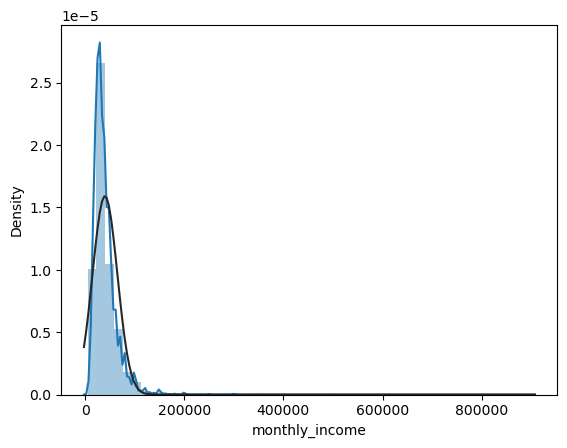

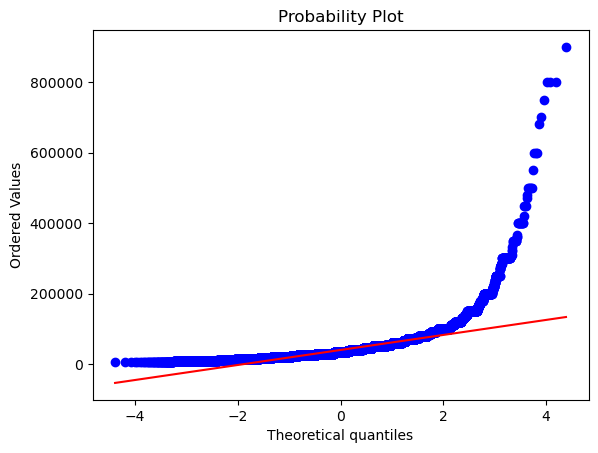

In [104]:
# строи гисторграмму распределения и график квантиль-квантиль для переменной monthly_income
sns.distplot(train['monthly_income'], fit = norm)
flg = plt.figure()
res = stats.probplot(train['monthly_income'], plot = plt)

In [105]:
# вычисляем коэффициент ассиметрии
train['monthly_income'].skew()

5.170662523993356

In [106]:
# вычисляем коэффициент эксцесса
train['monthly_income'].kurtosis()

81.08485953358395

C:\Users\DS\AppData\Local\Temp\ipykernel_7884\1846531874.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(train['monthly_income'] + a), fit = norm)


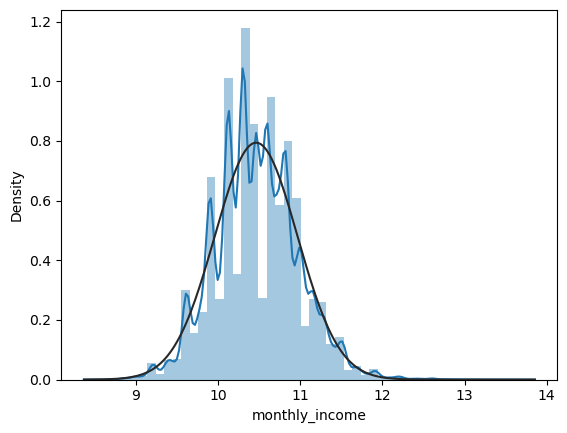

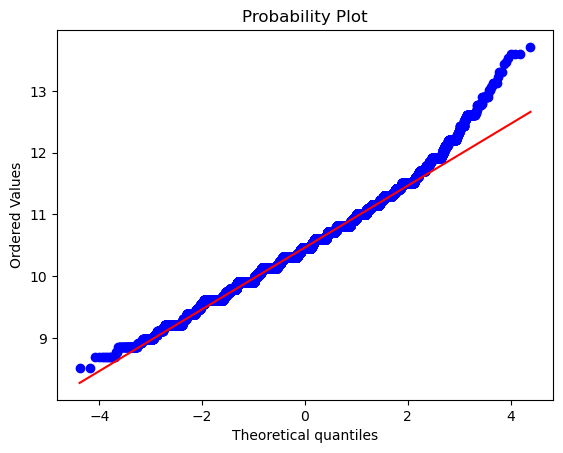

In [107]:
# строим гистограмму распределения и график квантиль-квантиль, применив логарифмическое преобразование для переменной
# monthly_income, используем константу а, чтобы не брать логарифм нуля
a = 0.001
sns.distplot(np.log(train['monthly_income'] + a), fit = norm)
flg = plt.figure()
res = stats.probplot(np.log(train['monthly_income'] + a), plot = plt)

C:\Users\DS\AppData\Local\Temp\ipykernel_7884\519025155.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.sign(train['monthly_income']) *


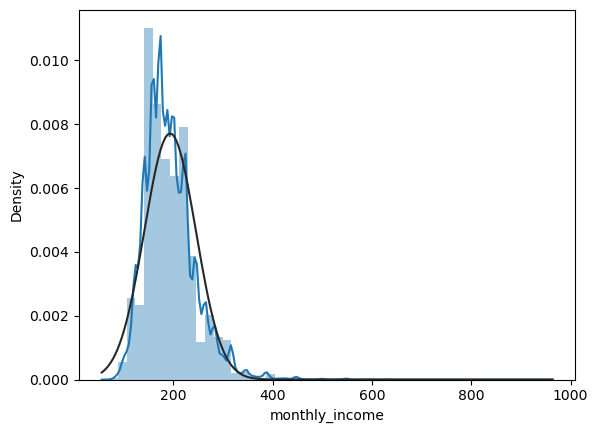

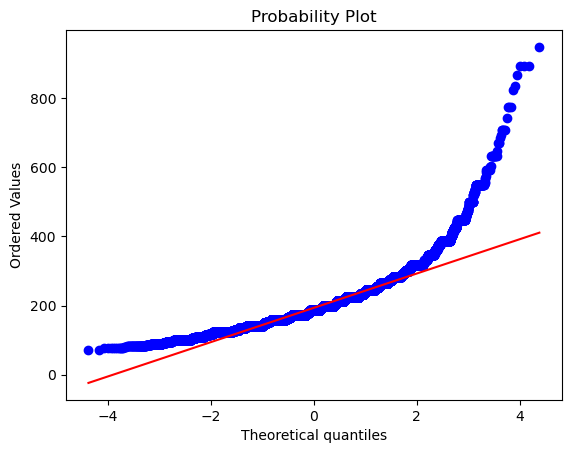

In [108]:
# строим гистограмму распределениия и график квантиль-квантиль, применив преобразование квадратным корнем для
# переменной monthly_income, используя модуль, что бы не вычислять корни отрицательных чисел и затем учитываем знак числа
sns.distplot(np.sign(train['monthly_income']) * 
             (train['monthly_income'].abs() ** (1/2)), fit = norm)
flg = plt.figure()
res = stats.probplot(np.sign(train['monthly_income']) * 
             (train['monthly_income'].abs() ** (1/2)), plot = plt)

C:\Users\DS\AppData\Local\Temp\ipykernel_7884\3940148482.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.sign(train['monthly_income']) *


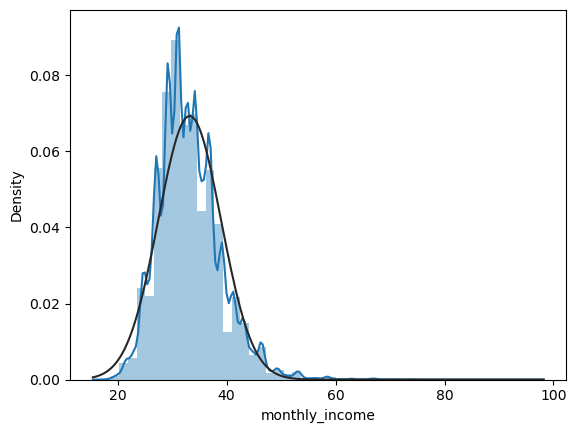

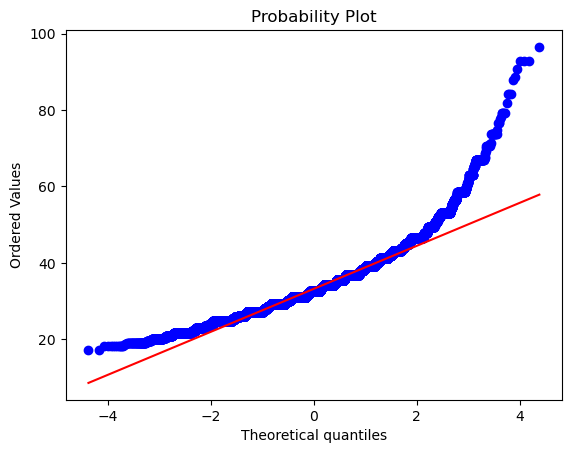

In [109]:
# строим гистограмму распределениия и график квантиль-квантиль, применив преобразование кубическим корнем для
# переменной monthly_income, используя модуль, что бы не вычислять корни отрицательных чисел и затем учитываем знак числа
sns.distplot(np.sign(train['monthly_income']) * 
             (train['monthly_income'].abs() ** (1/3)), fit = norm)
flg = plt.figure()
res = stats.probplot(np.sign(train['monthly_income']) * 
             (train['monthly_income'].abs() ** (1/3)), plot = plt)

C:\Users\DS\AppData\Local\Temp\ipykernel_7884\1664330013.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.sign(train['monthly_income']) *


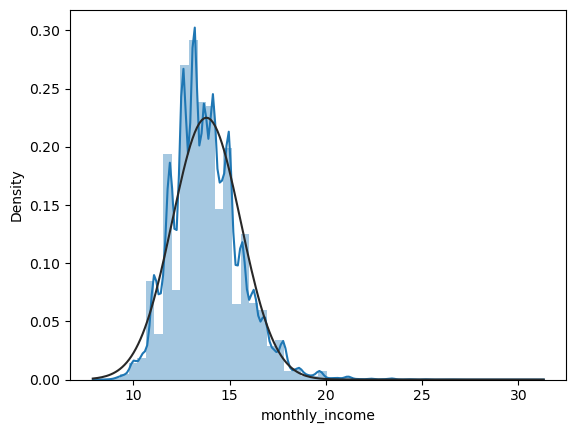

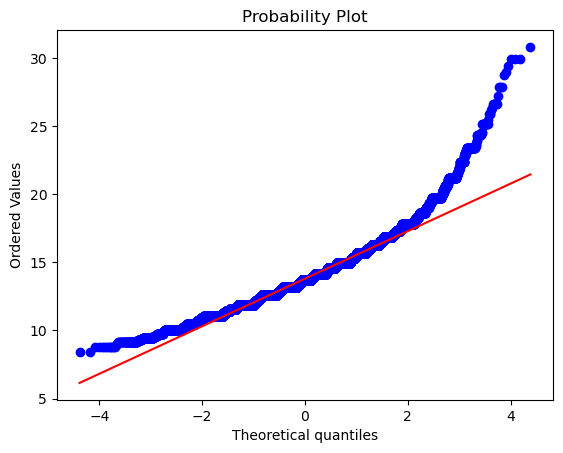

In [110]:
# строим гистограмму распределениия и график квантиль-квантиль, применив преобразование свернутым корнем для
# переменной monthly_income, используя модуль, что бы не вычислять корни отрицательных чисел и затем учитываем знак числа
sns.distplot(np.sign(train['monthly_income']) * 
             np.sqrt(np.sqrt(train['monthly_income'].abs())), fit = norm)
flg = plt.figure()
res = stats.probplot(np.sign(train['monthly_income']) * 
             np.sqrt(np.sqrt(train['monthly_income'].abs())), plot = plt)

Делаем вывод, что наилучшим преобразованием для переменной monthly_income будет логарифм

C:\Users\DS\AppData\Local\Temp\ipykernel_7884\1294266008.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['credit_sum'], fit = norm)


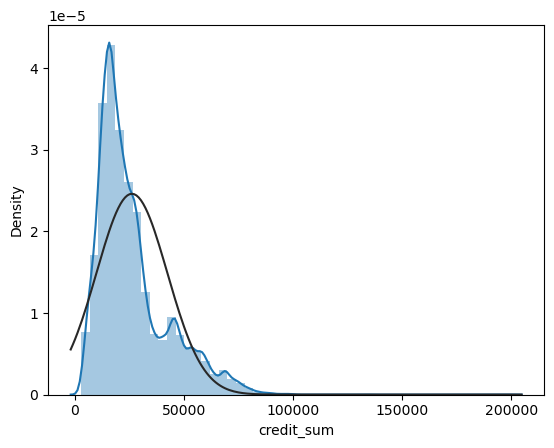

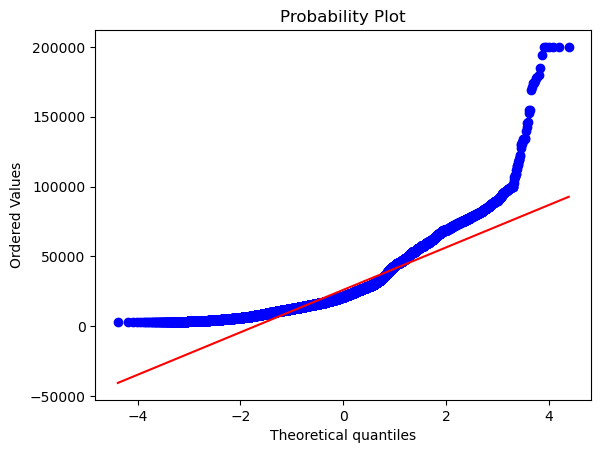

In [111]:
 # строим гистограмму распределения и график квантиль-квантиль для переменной credit_sum
sns.distplot(train['credit_sum'], fit = norm)
flg = plt.figure()
res = stats.probplot(train['credit_sum'], plot = plt)    

In [112]:
# импортируем функцию boxcox
from scipy.stats import boxcox

# выполняем преобразование Бокса-Кокса
transformed, lam = boxcox(train['credit_sum'])
print('Lambda: %f' % lam)

Lambda: 0.038149


C:\Users\DS\AppData\Local\Temp\ipykernel_7884\2934341981.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transformed, fit = norm)


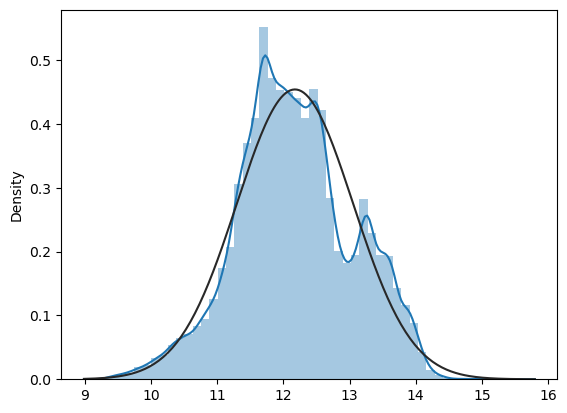

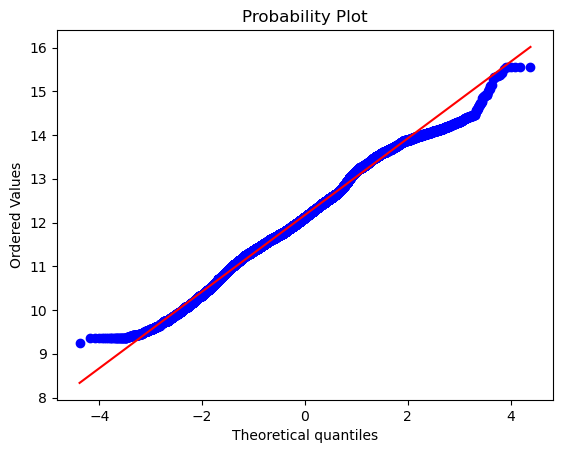

In [113]:
# строим гистограмму распределения и график квантиль-квантиль для переменной credit_sum, преобразованной с помощью функции 
# Бокса-Кокса
sns.distplot(transformed, fit = norm)
flg = plt.figure()
res = stats.probplot(transformed, plot = plt)    

In [114]:
# выполняем логарифмическое преобразование  указанных переменных
train['credit_sum'] = np.log(train['credit_sum'] + a)
train['monthly_income'] = np.log(train['monthly_income'] + a)
train['age'] = np.log(train['age'] + a)

test['credit_sum'] = np.log(train['credit_sum'] + a)
test['monthly_income'] = np.log(train['monthly_income'] + a)
test['age'] = np.log(train['age'] + a)

У нас есть переменная credit_sum, и на ее основе мы хотим создать новую категориальную переменную credsumcat. Давайте выясним
максимальное и минимальное значения


In [115]:
print(train['credit_sum'].min())
print(train['credit_sum'].max())

7.9142526442394505
12.206072650530174


In [116]:
# зададим границы категорий и выполним биннинг
bins = [-np.inf, 9.5, 10, 11, np.inf]
# осуществляем бининг переменной credit_sum и записываем результаты в новую переменную credsumcat 
train['credsumcat'] = pd.cut(train['credit_sum'], bins).astype('object')

In [117]:
# строим таблицу сопряженности credsumcat * open_account_flg
biv = pd.crosstab(train['credsumcat'], train['open_account_flg'])
biv

open_account_flg,0,1
credsumcat,,
"(-inf, 9.5]",17864,4950
"(9.5, 10.0]",32588,7207
"(10.0, 11.0]",42824,8112
"(11.0, inf]",5227,750


__WoE__ - (weight of evidence) или вес категории

При работе с WoE необходимо придерживаться четырех правил:
- количество категорий не должно превышать 10
- каждая категория должна содержать не менее 5% наблюдений
- категории не должны содержать нулевого количества событий или не событий
- пропущенные значениия группируются в отдельную категорию

In [118]:
# пишем функцию которая вычисляет Woe для каждой категории выбранной переменной, при этом используем умножение на 1.0,
# что бы преобразовать во float и добавляем а = 0.0001, чтобы избежать деления на 0
def WoE(df, feature, target):
    biv = pd.crosstab(df[feature], df[target].astype('str'))
    a = 0.0001
    WoE = np.log((1.0 * biv['0'] / sum(biv['0']) + a) / (1.0 * biv['1'] / sum(biv['1']) + a))
    return WoE

In [120]:
# вычисляем WoE для каждой категории переменной credsumcat
WoE(train, 'credsumcat', 'open_account_flg')

credsumcat
(-inf, 9.5]    -0.261
(9.5, 10.0]    -0.036
(10.0, 11.0]    0.119
(11.0, inf]     0.396
dtype: float64

__Information Value__ - информационное значение. IV - с его помощью можно узнать насколько переменная будет полезна, по сравнению с остальными переменными

Информационное значение всегда является положительной величиной. При интерпритации итоговых значений IV руководствуются правилами:
- меньше 0,02 - характеристика не обладает предсказательной способностью;
- от 0,02 до 0,1 - слабая предсказательная способность;
- от 0,1 до 0,3 - средняя предсказательная способность;
- 0,3 и выше - высокая предсказательная способность.

Значеиня IV более 0,5 обычно вызывают подозрения ("слишком хорошо что бы быть правдой") и нуждаются в дополнительной проверке

In [132]:
# пишем функцию, которая вычисляет итоговое IV для каждой категории выбранной переменной, при этом используем умножение на 1.0,
# что бы преобразовать во float и добавляем а = 0.0001, чтобы избежать деления на 0

def IV_cat(df, feature, target):
    biv = pd.crosstab(df[feature], df[target].astype('str'))
    a = 0.0001
    IV_cat = ((1.0 * biv['0'] / sum(biv['0']) + a) -
              (1.0 * biv['1'] / sum(biv['1']) + a)) * np.log(
        (1.0 * biv['0'] / sum(biv['0']) + a) / (1.0 * biv['1'] / sum(biv['1']) + a))
    return IV_cat

In [133]:
# вычисляем IV для каждой категории переменной credsumcat
IV_cat(train, 'credsumcat', 'open_account_flg')

credsumcat
(-inf, 9.5]    0.014
(9.5, 10.0]    0.000
(10.0, 11.0]   0.006
(11.0, inf]    0.007
dtype: float64

In [134]:
# пишем функцию, которая вычисляет итоговое IV для выбранной переменной, при этом используем умножение на 1.0,
# что бы преобразовать во float и добавляем а = 0.0001, чтобы избежать деления на 0
def IV(df, feature, target):
    biv = pd.crosstab(df[feature], df[target].astype('str'))
    a = 0.0001
    IV = sum(((1.0 * biv['0'] / sum(biv['0']) + a) -
              (1.0 * biv['1'] / sum(biv['1']) + a)) * np.log(
        (1.0 * biv['0'] / sum(biv['0']) + a) / (1.0 * biv['1'] / sum(biv['1']) + a)))
    return IV

In [136]:
# вычисляем итоговое IV для переменной credsumcat
IV(train, 'credsumcat', 'open_account_flg')

0.027264421039516484

In [137]:
# в данном случае переменная credsumcat обладает слабой предсказательной способностью
# удаляем переменную credsumcat

train.drop('credsumcat', axis = 1, inplace = True)

In [140]:
# Пишем функцию вычисляющую IV по всем количественным предикторам
def numeric_IV(df):
    iv_list = [] # создаем список в который будем записывать IV 
    df = df.copy() # создаем копию dataframe
    a = 0.0001 # записываем константу чтобы избежать деления на 0
    
    target = df['open_account_flg'].astype('str') # задаем зависимую переменную
    df = df.loc[:, df.apply(pd.Series.nunique) > 10] # отбираем столбцы у которых больше 10 уникальных значений
    numerical_columns = df.select_dtypes(include = ['number']).columns # отбираем столбцы только количественные
    
    for var_name in numerical_columns: # запускаем цикл вычисляющий IV для каждой переменной
        df[var_name] = pd.qcut(df[var_name].values, 10, duplicates = 'drop').codes # разбиваем переменную на 10 квантилей
        biv = pd.crosstab(df[var_name], target) # строим таблицу сопряженности между катег переменной и зависимой переменной
        IV = sum(((1.0 * biv['0'] / sum(biv['0']) + a) -
                  (1.0 * biv['1'] / sum(biv['1']) + a)) * np.log(
            (1.0 * biv['0'] / sum(biv['0']) + a) / (1.0 * biv['1'] / sum(biv['1']) + a))) # вычисляем IV 
        iv_list.append(IV) # добавляем вычисленнное IV в списокб где хранятся IV 
    
    col_list = list(numerical_columns) # создаем список с названиями столбцов
    result = pd.DataFrame({'Название переменной': col_list,'IV': iv_list}) # создаем датафрейм с двумя столбцами 
    result['Полезность'] = ['Подозрительно высокая' if x > 0.5 else 'Сильная'
                                                    if x <= 0.5 and x > 0.3 else 'Средняя'
                                                    if x <= 0.3 and x > 0.1 else 'Слабая'
                                                    if x <= 0.1 and x > 0.02 else 'Бесполезная'
                                                    for x in result['IV']]
    return(result.sort_values(by = 'IV', ascending = False))

In [141]:
numeric_IV(train)

,Название переменной,IV,Полезность
6,tariff,0.143,Средняя
1,credit_sum,0.066,Слабая
0,age,0.062,Слабая
2,credit_month,0.038,Слабая
3,score_shk,0.021,Слабая
5,credit_count,0.015,Бесполезная
4,monthly_income,0.006,Бесполезная
